# Forest Cover Type Prediction

## Project description : 
*Get started on this competition with Kaggle Scripts. No data download or local environment needed!*

*Random forests? Cover trees? Not so fast, computer nerds. We're talking about the real thing.*

*In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.*

*This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.*

Every variables described in the description seem to be cartographic, no trap here, we can use them all.

## Ressources : 
* data origin : Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

## github :
 https://github.com/ClaireGayral/formation_openclassroom/tree/master/P8_gayral_claire

In [1]:
DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P8/forest/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P8/"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pickle
import time
import re

from sklearn.cluster import FeatureAgglomeration
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hinge_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# How to reconcile categorical and numerical data for classification ? 

## Table of contents :

<a id ="menu"></a>
1. [ Exploratory Analysis for Categorical Variables](#section1)
    1. [Outputs - the soils](#section1.1)
    2. [Categorical Input Variables](#section1.2)
        1. [Univariate Analysis](#section1.2)
        2. [Multivariate Analysis](#section1.2)
    3. [Feature engineering](#section1.3)
        1. [Classical preprocess](#section1.3.1)
        2. [Feature selection](#section1.3.2)
        3. [Reduction of dimension](#section1.3.3)
    
2. [ Exploratory Analysis for Numerical data](#section2)
    1. [Univariate Analysis](#section2.1)
    2. [Multivariate Analysis](#section2.2)
    3. [Feature engineering](#section2.3)
        1. [Classical preprocess](#section2.3.1)
        2. [Reduction of dimension](#section2.3.2)
        3. [Hand made](#section2.3.3)
        
3. [Classification](#section3)
    1. [Calling preprocesses, get datasets](#section3.1)
    2. [Different models](#section3.2)
          1. [Classification multi-class](#section3.2.1)
          2. [Classification model](#section3.2.2)
          3. [Set classification model parameters with CV](#section3.2.3)       
    3. [Analyse of the bests models](#section3.3)
          1. [Time of training and prediction](#section3.3.1)
          2. [Confusion Matrix](#section3.3.2)
4. [Putting the model into production](#section4)
    1. [Compute preprocess on data](#section4.1)
          1. [Export from beginning](#section4.1.1)
          2. [Complete preprocessing](#section4.1.2)
    2. [Support Vector Machine Classification](#section4.2)

In [386]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
print("train data shape : ", df_train.shape)
df_train.head()

train data shape :  (15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [387]:
df_test = pd.read_csv(DATA_PATH+"/test.csv", index_col=0)
print("test data shape : ", df_test.shape)
df_test.head()

test data shape :  (565892, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


A first reading of the data allows to separate the input variables from the output variables : 

In [388]:
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

 I split categorical and numerical data to analyse them. In the [project data description](https://www.kaggle.com/c/forest-cover-type-prediction/data) every column is well defined.


In [389]:
soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

cat_vars = soil_vars + area_vars
num_vars = [col for col in X.columns if col not in cat_vars]

<a id ="section1"></a>
<a id ="section1.1"></a>
[back to menu](#menu)

# 1. Exploratory Analysis for Categorical data

Let's begin with output data.

## 1.A Output Variable

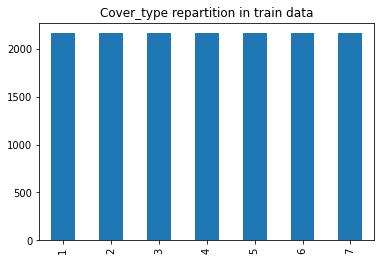

In [390]:
# sns.countplot(x = "soil_type", data = X_cat, sort)
y.value_counts().plot(kind= "bar")
plt.title("Cover_type repartition in train data")
plt.xticks(rotation=90)
plt.show()

The output categories are well represented, the repartition in each class is homogeneous.

<a id ="section1.2"></a>
[back to menu](#menu)

## 1.B Categorical Input Variables

In [391]:
## Recall :
# soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
# area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

## remove text in var name to clarify plots : 
def get_final_int(x) : return(int(re.split(r'(\d+)', x)[-2]))

map_soil_var = {var : get_final_int(var) for var in soil_vars}
soil_cat = X.loc[:,soil_vars] 
soil_cat = soil_cat.rename(map_soil_var, axis=1)
soil_cat = soil_cat.idxmax(axis=1)

map_area_var = {var : get_final_int(var) for var in area_vars}
area_cat = X.loc[:,area_vars] 
area_cat = area_cat.rename(map_area_var, axis=1)
area_cat = area_cat.idxmax(axis=1)

<a id ="section1.2.1"></a>
[back to menu](#menu)

## 1.B.a Univariate Analysis

A quick check of the categorical variables shows that the classes are well separated (we are not in multi-label classification)

In [392]:
tmp = X.loc[:, soil_vars].sum(axis=1).value_counts()
print("Percentage of one-classe soil : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

tmp = X.loc[:, area_vars].sum(axis=1).value_counts()
print("Percentage of one-classe area : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

Percentage of one-classe soil :  100.0 %
Percentage of one-classe area :  100.0 %


Univariate analysis :

In [393]:
X_cat = pd.concat((soil_cat,area_cat), axis=1)
X_cat = X_cat.rename({0:"soil_type", 1: "area"}, axis=1)

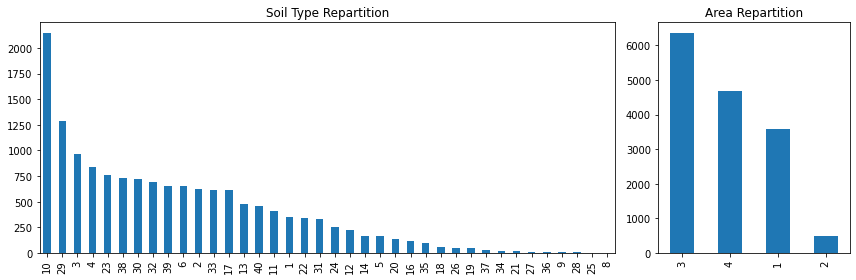

In [394]:
# plot it
f, (a0, a1) = plt.subplots(1, 2, 
                           gridspec_kw={'width_ratios': [3, 1]},
                           figsize=(12,4))

# sns.countplot(x = "soil_type", data = X_cat, sort)
X_cat["soil_type"].value_counts().plot(kind= "bar", ax=a0)
a0.set_title("Soil Type Repartition")

X_cat["area"].value_counts().plot(kind= "bar", ax=a1)
a1.set_title("Area Repartition")
plt.tight_layout()
plt.savefig(RES_PATH + "figures/"+"cat_hist")
plt.show()

Note that some categories like "soil_type_25" or "2" are very badly represented
<a id ="section1.2.2"></a>
[back to menu](#menu)

## 1.B.b Multivariate Analysis
### Bivariate analysis (input/input)

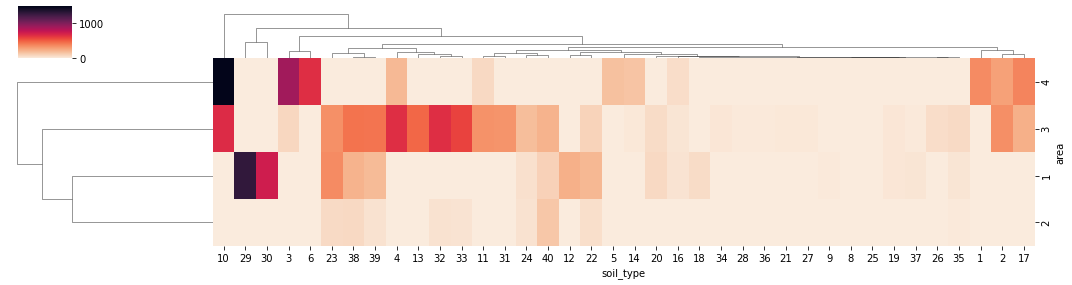

In [395]:
sns.clustermap(pd.crosstab(X_cat["area"], X_cat["soil_type"]),
               figsize=(15, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

The distribution of the two categories is structured: we will have to pay attention to the correlation between the two. 
It may be a good idea to use the text description of soil to gather them (TODO : see if text-mining is relevant)

In [396]:
from caterogical_vars_description import *

### Output/input categorical link :
Let's reveal the correlation between our categories and the output variable : 

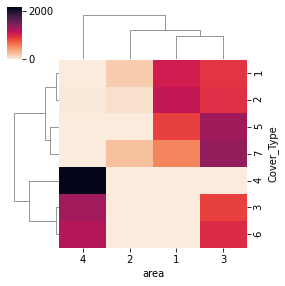

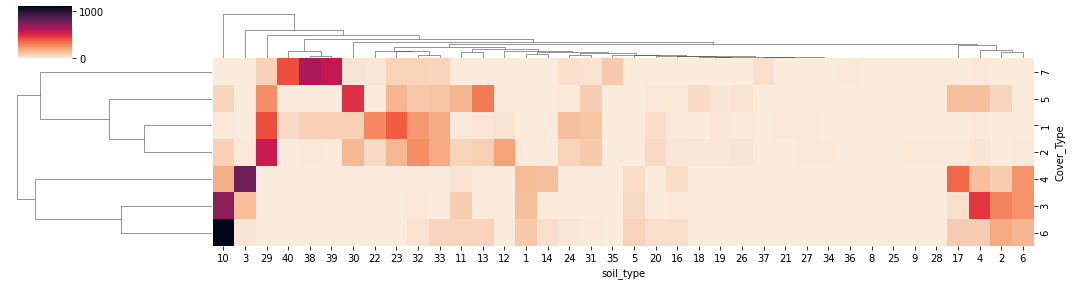

In [397]:
X_caty = pd.concat((X_cat, y), axis = 1)
sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["area"]),
               figsize=(4, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["soil_type"]),
               figsize=(15,4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

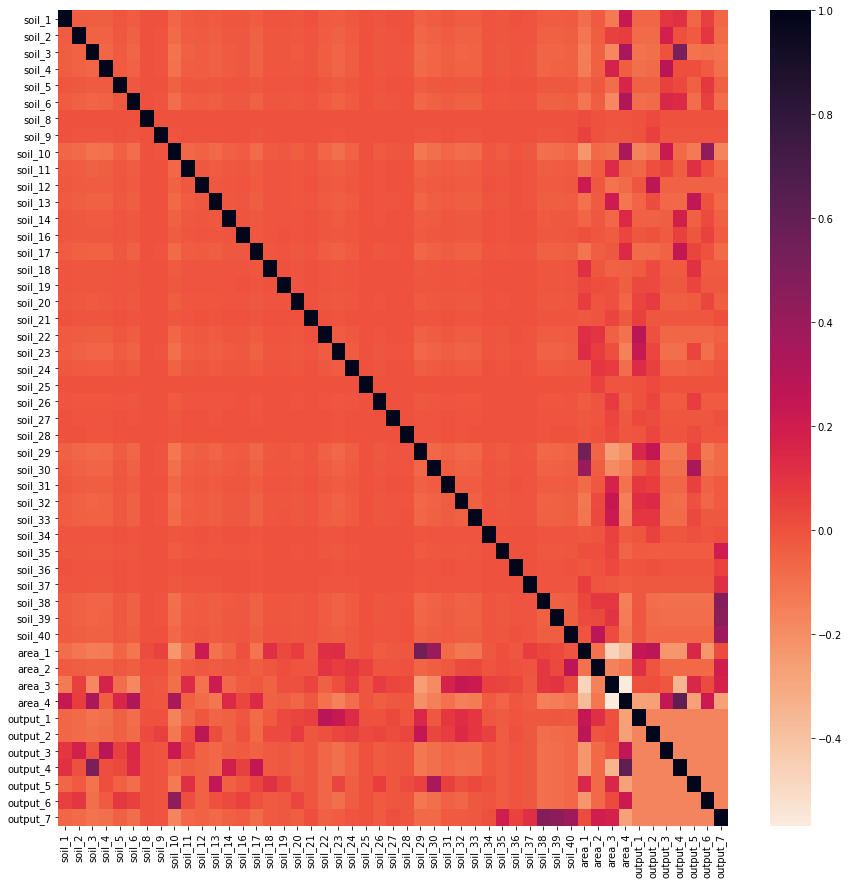

In [398]:
plt.figure(figsize=(15,15))
X_caty_dum = pd.concat((pd.get_dummies(X_cat.soil_type, "soil"),
                        pd.get_dummies(X_cat.area, "area"),
                        pd.get_dummies(y,"output")), axis = 1)
sns.heatmap(X_caty_dum.corr(), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

There's a real link between the categorical inputs and the classification. 

<a id ="section1.3"></a>
[back to menu](#menu)

## 1.C Feature engineering : 

The selection of relevant feature is well documented in [sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)

<a id ="section1.3.1"></a>
[back to menu](#menu)

### 1.C.a Classical preprocessing 
First of all, let's split the training data, and remove constant variables. 

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,cat_vars], y, random_state=10)
# train_index = X_train.index
# test_index = X_test.index

#### Drop non variant variables :

In [400]:
pd.DataFrame(np.round(pd.get_dummies(X_cat["area"]).std(), 2), columns=["std"]).transpose()

,1,2,3,4
std,0.43,0.18,0.49,0.46


In [401]:
pd.DataFrame(np.round(pd.get_dummies(X_cat["soil_type"]).std(), 2), columns=["std"]).transpose()

,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
std,0.15,0.2,0.24,0.23,0.1,0.2,0.01,0.03,0.35,0.16,...,0.15,0.21,0.2,0.04,0.08,0.03,0.05,0.21,0.2,0.17


In [402]:
sel = VarianceThreshold(threshold=(0.001))
sel.fit(X_train)
X_train.shape[1],len(sel.get_feature_names_out())

(44, 37)

Droped variables (Not variant) are : 

In [403]:
print([var for var in X_train.columns if var not in sel.get_feature_names_out()])

['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36']


In [404]:
droped_cat_var = ['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15',
                 'Soil_Type25','Soil_Type28','Soil_Type36']
droped_cat_var = X_train.columns.intersection(droped_cat_var)
X_train = X_train.drop(droped_cat_var, axis = 1)
X_test = X_test.drop(droped_cat_var, axis = 1)

#### Model reference (before more feature engineering)

In [405]:
svm = LinearSVC(dual=False).fit(X_train,y_train)
y_pred = svm.predict(X_test)
y_pred = pd.Series(y_pred,index = y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.44      0.48       543
           2       0.44      0.61      0.51       523
           3       0.49      0.47      0.48       505
           4       0.77      0.73      0.75       562
           5       0.59      0.53      0.56       544
           6       0.55      0.59      0.57       549
           7       0.88      0.81      0.84       554

    accuracy                           0.60      3780
   macro avg       0.61      0.60      0.60      3780
weighted avg       0.61      0.60      0.60      3780



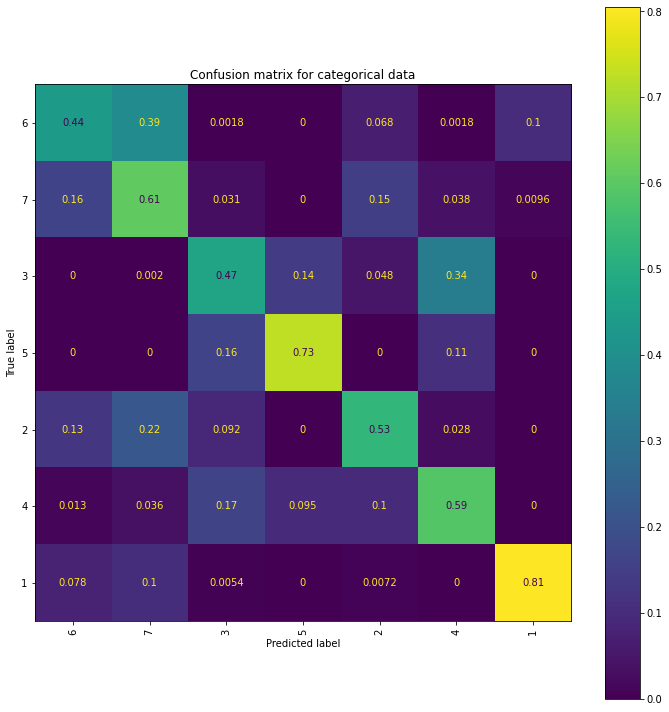

In [406]:
## Confusion 
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_confusion_matrix")
plt.show()

In [407]:
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", hinge_loss(y_test,Y_pred))

AUC =  0.7648917551750781
Balanced Accuracy =  0.5965142578317818
Cohen Kappa score =  0.5321802419772571
Matthews Corrcoef =  0.5335027676205927
Hinge Loss =  0.8021164021164021


<a id ="section1.3.2"></a>
[back to menu](#menu)

### 1.C.b Feature Selection

In this section, we aim tp drop the non determinant categories in input variables.

The "importance" of each categorical variable can be chosen with a simple ridge selection, as proposed [in this sklearn example](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

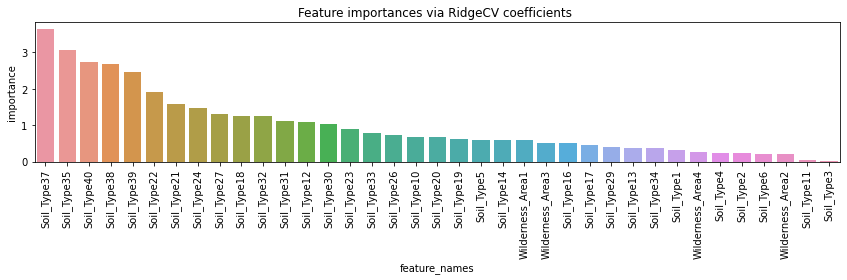

In [408]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)
feature_names = X_train.columns

tmp = pd.DataFrame(importance, index=feature_names, columns=["importance"]).reset_index()
tmp = tmp.rename({"index":"feature_names"}, axis =1)
tmp = tmp.sort_values("importance", ascending=False)

plt.figure(figsize=(12,4))
sns.barplot(y="importance", x="feature_names", data=tmp)
plt.title("Feature importances via RidgeCV coefficients ")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_importance_RidgeCV")
plt.show()

#### ANOVA + SVC
Let's compute a categorical variable selection by computing an ANOVA and git its outputs to an Support Vector Machine Classifier. 
The code is mainly copied from [this sklearn example]() 


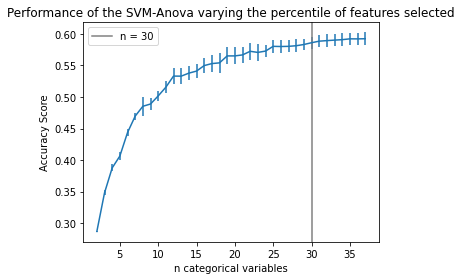

In [409]:

# # #############################################################################
# # Create a feature-selection transform, a scaler and an instance of SVM that we
# # combine together to have a full-blown estimator
# clf = Pipeline(
#     [
#         ("anova", SelectPercentile(chi2)),
#         ("scaler", StandardScaler()),
#         ("svc", SVC(gamma="auto")),
#     ]
# )

# # #############################################################################
# # Plot the cross-validation score as a function of percentile of features
# score_means = list()
# score_stds = list()
# ## from 2 to nb cat vars : 
# percentiles = np.linspace(0,100, num=X_train.shape[1]+1)[2:]

# for percentile in percentiles:
#     clf.set_params(anova__percentile=percentile)
#     this_scores = cross_val_score(clf, X_train, y_train)
#     score_means.append(this_scores.mean())
#     score_stds.append(this_scores.std())
    
# with open(RES_PATH+"res/"+"cat_feature_select_ANOVA_SVM"+".pkl", "wb") as f :
#     pickle.dump((percentiles, score_means, score_stds, this_scores), f, pickle.HIGHEST_PROTOCOL)

with open(RES_PATH+"res/"+"cat_feature_select_ANOVA_SVM"+".pkl", "rb") as f :
    (percentiles, score_means, score_stds, this_scores) = pickle.load(f)
  
plt.figure(figsize=(5,4))
plt.errorbar(range(2,len(percentiles)+2), score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xlabel("n categorical variables")
plt.ylabel("Accuracy Score")
k = 30
plt.axvline(x=k, color="grey", label="n = "+str(k))
plt.legend()
plt.axis("tight")
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_importance_percentile")
plt.show()

In [410]:
this_scores

array([0.5978836 , 0.59611993, 0.57892416, 0.60626102, 0.58289242])

Adding the last variables doest not change much the model. Let's remove them and check the prediction : 

In [411]:
nb_keep = 25

anova = SelectPercentile(chi2, percentile = percentiles[nb_keep-2])
anova.fit(X_train, y_train)
print("removed variables :", [v for v in X_train.columns if v not in anova.get_feature_names_out()])

removed variables : ['Soil_Type5', 'Soil_Type11', 'Soil_Type16', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type26', 'Soil_Type27', 'Soil_Type31', 'Soil_Type34', 'Soil_Type37']


The removed categorical variables are thoose that appears the less. This feature selection might be biased by that... 

In [412]:
cat_selected_vars = anova.get_feature_names_out()

X_train_small = X_train[cat_selected_vars]
X_test_small = X_test[cat_selected_vars]

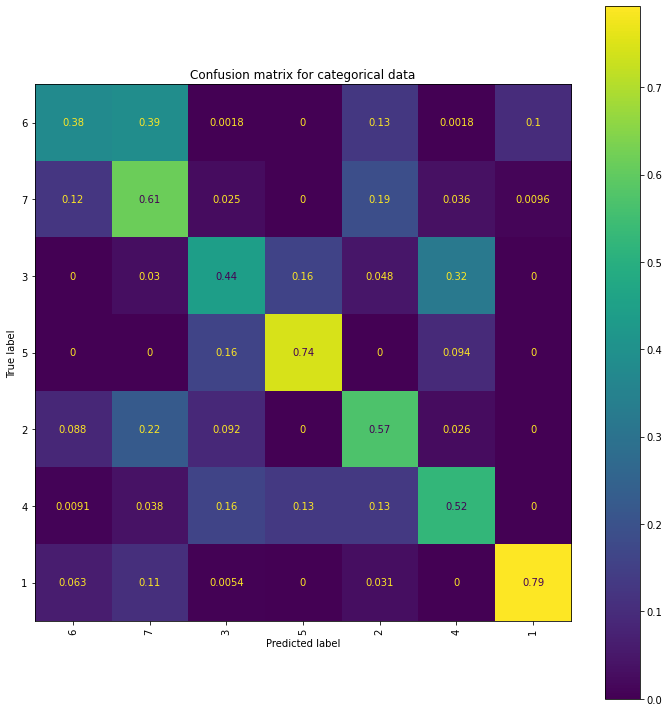

AUC =  0.7558770580607297
Balanced Accuracy =  0.5810484364987483
Cohen Kappa score =  0.514255516235161
Matthews Corrcoef =  0.5161994740321826
Hinge Loss =  0.8328042328042328


In [413]:
svm = LinearSVC(dual=False).fit(X_train_small,y_train)
y_pred = svm.predict(X_test_small)
y_pred = pd.Series(y_pred,index = y_test)

## Confusion 
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")

cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_confusion_matrix_12selec")
plt.show()
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", hinge_loss(y_test,Y_pred))

As a recall, without feature selection, the result where : 
* AUC =  0.7648917551750781
* Balanced Accuracy =  0.5965142578317818
* Cohen Kappa score =  0.5321802419772571
* Matthews Corrcoef =  0.5335027676205927
* Hinge Loss =  0.8021164021164021

With this feature selection, the model tend to predict "7" for cover type "4" more often than necessary. This may not be relevant.

In [414]:
print([var for var in X_train.columns if var not in cat_selected_vars])

['Soil_Type5', 'Soil_Type11', 'Soil_Type16', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type26', 'Soil_Type27', 'Soil_Type31', 'Soil_Type34', 'Soil_Type37']


#### Selecting feature importance with tree :

Another [example sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py) uses tree-based classifier methods, and compare with and without permutation of variables :


In [415]:
feature_names = X_train.columns#[f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Elapsed time to compute the importances: 0.007 seconds


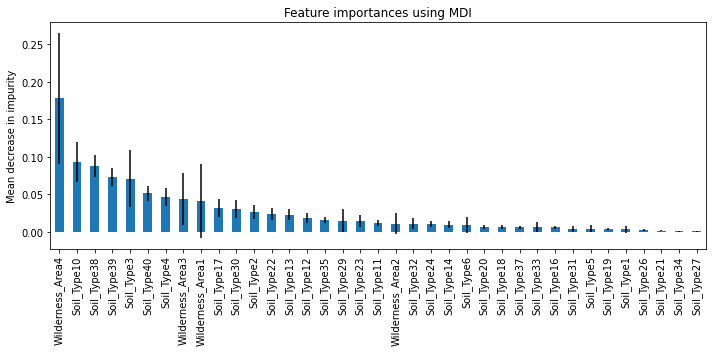

In [416]:
## Feature importance based on mean decrease in impurity
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

## plot
tmp = pd.DataFrame(importances, columns=["importance"], index=feature_names)
tmp.loc[:,"err"] = std
tmp = tmp.sort_values("importance",ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Elapsed time to compute the importances: 5.056 seconds


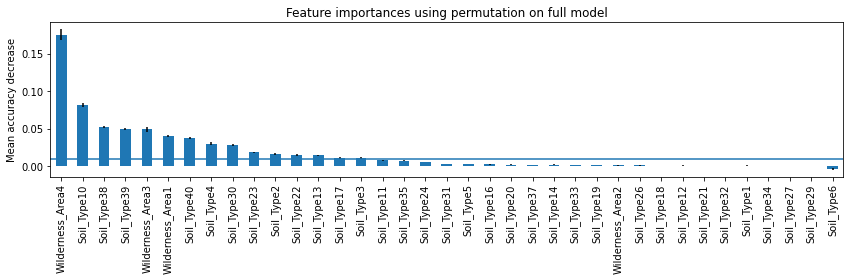

In [417]:
## Feature importance based on feature permutation

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, 
    n_repeats=10, random_state=42, n_jobs=8
    )
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(result.importances_mean, index=feature_names)

## plot
tmp = pd.DataFrame(forest_importances,columns=["importance"], index=feature_names)
tmp.loc[:,"err"] = result.importances_std
tmp = tmp.sort_values("importance",ascending=False)

fig, ax = plt.subplots(figsize=(12,4))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.axhline(0.01)
fig.tight_layout()
plt.savefig(RES_PATH+"figures/"+"cat_importance_randomForest")
plt.show()

In [420]:
thrs = 0.005
print("dropped vars : ", tmp["importance"][tmp["importance"]< thrs].index)
print("kept vars : ", tmp["importance"][tmp["importance"]>= thrs].index)
X_new_feature_selection = X.loc[:, tmp["importance"][tmp["importance"]>= thrs].index]

X_new_feature_selection.to_csv(RES_PATH+"X_cat_feature_selection.csv")
X_new_feature_selection.loc[train_index,:].to_csv(RES_PATH+"X_cat_feature_selection_train.csv")
X_new_feature_selection.loc[test_index,:].to_csv(RES_PATH+"X_cat_feature_selection_test.csv")


dropped vars :  Index(['Soil_Type31', 'Soil_Type5', 'Soil_Type16', 'Soil_Type20',
       'Soil_Type37', 'Soil_Type14', 'Soil_Type33', 'Soil_Type19',
       'Wilderness_Area2', 'Soil_Type26', 'Soil_Type18', 'Soil_Type12',
       'Soil_Type21', 'Soil_Type32', 'Soil_Type1', 'Soil_Type34',
       'Soil_Type27', 'Soil_Type29', 'Soil_Type6'],
      dtype='object')
kept vars :  Index(['Wilderness_Area4', 'Soil_Type10', 'Soil_Type38', 'Soil_Type39',
       'Wilderness_Area3', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type4',
       'Soil_Type30', 'Soil_Type23', 'Soil_Type2', 'Soil_Type22',
       'Soil_Type13', 'Soil_Type17', 'Soil_Type3', 'Soil_Type11',
       'Soil_Type35', 'Soil_Type24'],
      dtype='object')


<a id ="section1.3.3"></a>
[back to menu](#menu)

### 1.C.c Reduction of dimension : 

#### Projection in smaller space - Compare PCA, NMF and LDA :

[This example of sklearn](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py) proposes to compare the PCA an NMF projection with the KBest feature selector (used just above)

Note that some method projecting categorical data such that [MCA](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwim84uU2p_1AhWhyIUKHdKGDGUQFnoECAQQAQ&url=http%3A%2F%2Fwww.math.u-bordeaux.fr%2F~mchave100p%2Fwordpress%2Fwp-content%2Fuploads%2F2013%2F10%2FACM-M2.pdf&usg=AOvVaw1BoiTWjdG3fKvAvAP0RAMD) would be more appropriate, but they are not proposed in sklearn. 


In [308]:
pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ('standardscaler', StandardScaler()),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8, 10, 15, 20, 25, 30]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(init="nndsvda"), 
                       LatentDirichletAllocation()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(chi2)", "LDA"]

grid = GridSearchCV(pipe, cv=5, n_jobs=8, param_grid=param_grid)
# grid.fit(X_train, y_train)
# with open(res_path+"CV_gridsearch_models/"+"cat_reduc_dim"+".pkl", "wb") as f :
#     pickle.dump(grid, f, pickle.HIGHEST_PROTOCOL)

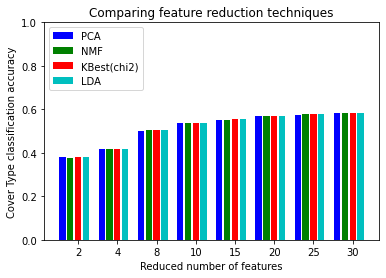

In [309]:
with open(RES_PATH+"CV_gridsearch_models/"+"cat_reduc_dim"+".pkl", "rb") as f :
    grid= pickle.load(f)
    
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Cover Type classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

In [310]:
def coeffs_on_4first_compo(X_, my_meth, palette_name = "inferno") : 
    ## fit model
    my_meth.fit(X_)
    my_meth_name = str(my_meth).split("(")[0]
    coeffs = pd.DataFrame(my_meth.components_, columns = X_.columns,
                      index = ["ax_"+str(k) for k in np.arange(1,my_meth.n_components+1)])
    
    ## init plot
    
    palette=sns.color_palette(palette_name, n_colors=int(X_.shape[1]))
    plt.subplot(1,2,1)
    for i,colname in enumerate(coeffs.columns) :
            plt.scatter(x = coeffs.loc["ax_1", colname], 
                        y = coeffs.loc["ax_2", colname],
                        label = colname, color=palette[i],
                        marker="x"
                        )
    plt.xlabel("coeff axis 1")
    plt.ylabel("coeff axis 2")
    plt.title(my_meth_name+" on categorical data \nAxis 1 and 2",fontsize=14)
    plt.legend("",frameon=False)

    plt.subplot(1,2,2)
    for i,colname in enumerate(coeffs.columns) :
        plt.scatter(x = coeffs.loc["ax_3", colname], 
                    y = coeffs.loc["ax_4", colname],
                    label = colname, color=palette[i],
                    marker="x"
                    )
    plt.xlabel("coeff axis 3")
    plt.ylabel("coeff axis 4")
    my_meth_name = str(my_meth).split("(")[0]
    plt.title(my_meth_name+" on categorical data \nAxis 3 and 4",fontsize=14)
    plt.legend(title="X variables", bbox_to_anchor=(1, 1), ncol=3)

In [311]:
def coeffs_on_1_to_4_compo(X_, my_meth, n_4axis=[1,2,3,4], palette_name = "inferno") : 
    
    ## fit model
    my_meth.fit(X_)
    my_meth_name = str(my_meth).split("(")[0]
    coeffs = pd.DataFrame(my_meth.components_, columns = X_.columns,
                      index = ["ax_"+str(k) for k in np.arange(1,my_meth.n_components+1)])
    
    ## init plot
    
    palette=sns.color_palette(palette_name, n_colors=int(X_.shape[1]))
    plt.subplot(1,2,1)
    for i,colname in enumerate(coeffs.columns) :
            plt.scatter(x = coeffs.loc["ax_"+str(n_4axis[0]), colname], 
                        y = coeffs.loc["ax_"+str(n_4axis[1]), colname],
                        label = colname, color=palette[i],
                        marker="x"
                        )
    plt.xlabel("coeff axis"+str(n_4axis[0]))
    plt.ylabel("coeff axis"+str(n_4axis[0]))
    my_title = str(my_meth_name+" on categorical data \nAxis "+str(n_4axis[0])+
                  " and "+str(n_4axis[1]))
    plt.title(my_title,fontsize=14)
    plt.legend("",frameon=False)

    plt.subplot(1,2,2)
    for i,colname in enumerate(coeffs.columns) :
        plt.scatter(x = coeffs.loc["ax_"+str(n_4axis[2]), colname], 
                    y = coeffs.loc["ax_"+str(n_4axis[3]), colname],
                    label = colname, color=palette[i],
                    marker="x"
                    )
    plt.xlabel("coeff axis "+str(n_4axis[2]))
    plt.ylabel("coeff axis "+str(n_4axis[3]))
    my_meth_name = str(my_meth).split("(")[0]
    my_title = str(my_meth_name+" on categorical data \nAxis "+str(n_4axis[2])+
              " and "+str(n_4axis[3]))
    plt.title(my_title,fontsize=14)
    plt.legend(title="X variables", bbox_to_anchor=(1, 1), ncol=3)

In [312]:
def print_projection_on_axes(X_proj, my_meth_name, labels):
    plt.subplot(1,2,1)
    for cover_type in labels.unique():
        idx = labels[labels == cover_type].index
        plt.scatter(x=X_proj.loc[idx,"ax_1"], y=X_proj.loc[idx,"ax_2"], 
                     alpha = 0.5, marker="x", 
                     label = str(cover_type)
                   )
    plt.legend("", frameon=False)
    plt.title("Forests on " + my_meth_name + " axis 1 and 2", fontsize=14)
    plt.xlabel(my_meth_name + " axis 1")
    plt.ylabel(my_meth_name + " axis 2")

    plt.subplot(1,2,2)
    for cover_type in labels.unique():
        idx = labels[labels == cover_type].index
        plt.scatter(x=X_proj.loc[idx,"ax_3"], y=X_proj.loc[idx,"ax_4"], 
                     alpha = 0.5, marker="x", 
                     label = str(cover_type)
                   )
    plt.legend(title="Cover Type", bbox_to_anchor=(1, 1))
    plt.title("Forests on " + my_meth_name + " axis 3 and 4", fontsize=14)
    plt.xlabel(my_meth_name + " axis 3")
    plt.ylabel(my_meth_name + " axis 4")

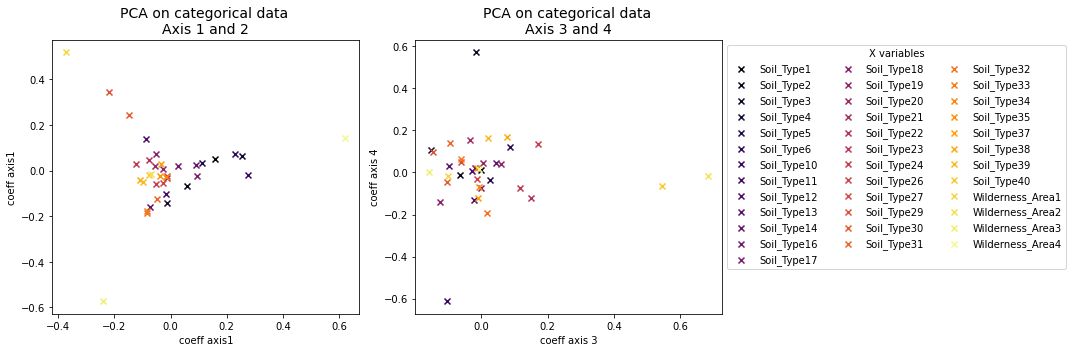

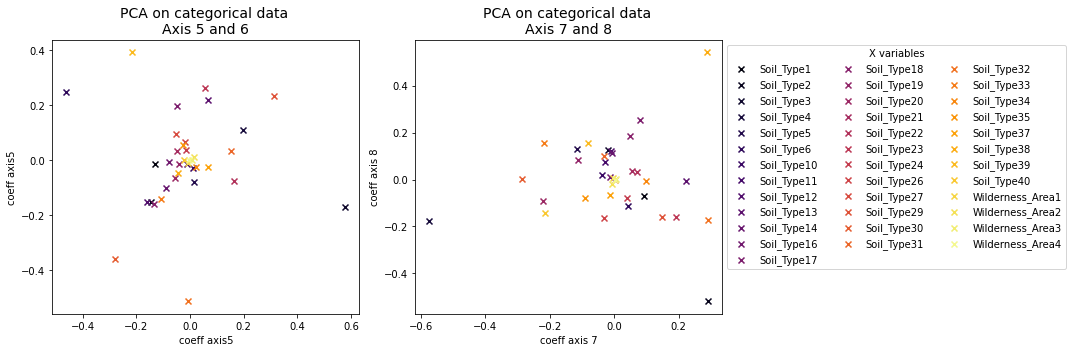

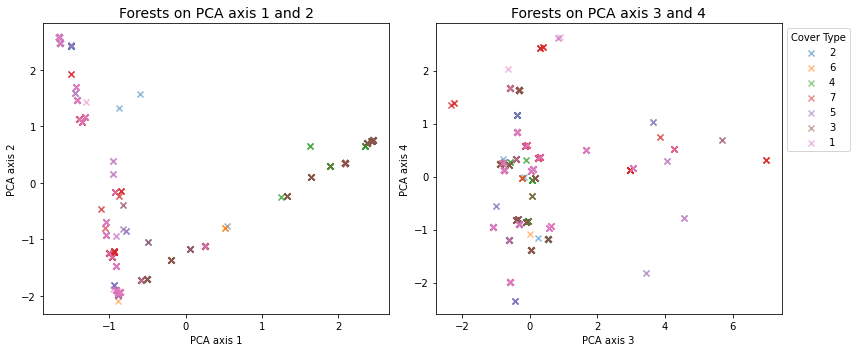

In [313]:
# Xtmp = X_train.copy()
# Xtmp[Xtmp == 0] = -1
X_ = StandardScaler().fit_transform(X_train)
X_ = pd.DataFrame(X_, index=X_train.index, columns=X_train.columns)
my_meth = PCA(n_components=8).fit(X_)
my_meth_name = "PCA"
plt.figure(figsize=(15,5))
coeffs_on_1_to_4_compo(X_, my_meth)
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_PCA_coeff_4axis")
plt.show()

plt.figure(figsize=(15,5))
coeffs_on_1_to_4_compo(X_, my_meth, [5,6,7,8])
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_PCA_coeff_8axis")
plt.show()

X_proj = pd.DataFrame(my_meth.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,my_meth.n_components+1)])
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.tight_layout()
plt.show()

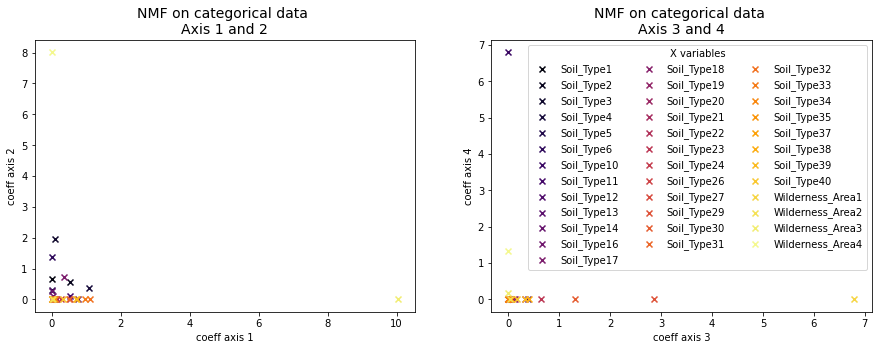

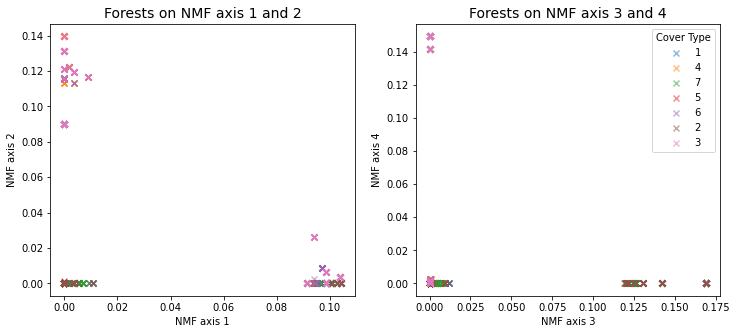

In [314]:
my_meth = NMF(init="nndsvda", n_components=4)
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_train, my_meth)
plt.show()

## project on 4 axis an color with output classif
X_proj = pd.DataFrame(my_meth.transform(X_train), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])

X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "NMF", labels)
plt.show()

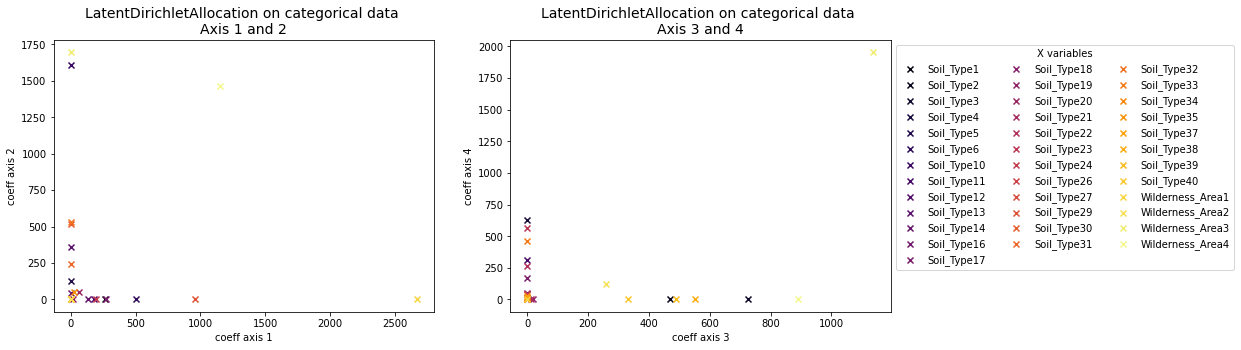

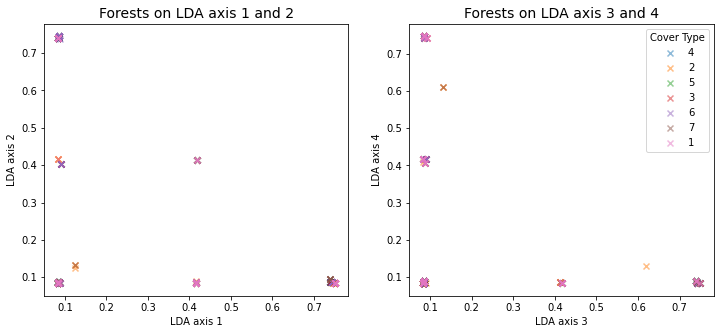

In [315]:
my_meth = LatentDirichletAllocation(n_components=4)
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_train, my_meth)
plt.show()

## project on 4 axis an color with output classif
X_proj = pd.DataFrame(my_meth.transform(X_train), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])

X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "LDA", labels)
plt.show()

<!-- Ces méthodes de projection n'ont pas l'air de bien séparer les classes de sols. Vu que les dimensions sont petites, on restera juste avec les variables numériques. Autres idées pour réduire la dimension : 
Lancer une ANOVA "cover_type $\sim$ numerical_var" pour voir comment les chemins de régularisation évoluent. Cela permettrait de répondre à la question "est ce que la variable numérique sépare bien les classes de la variable catégorielle" -->

These projection methods do not seem to separate the soil classes well. Since the dimensions are small, we will just stay with the numerical variables. 

Let's check the classification from PCA projection with best n_composants, that is 20 : 

In [422]:
n_compo = 20
X_ = X.loc[train_index,cat_vars]
## std :
my_std = StandardScaler().fit(X_)
X_train_cat = my_std.transform(X_)
X_test_cat = my_std.transform(X.loc[test_index, cat_vars])
## PCA :
my_pca_cat = PCA(n_components=n_compo).fit(X_train_cat)
cat_pca_axis = ["cat_ax_"+ str(k+1) for k in range(n_compo)]
X_train_cat_proj = pd.DataFrame(my_pca_cat.transform(X_train_cat),
                                index = train_index, columns=cat_pca_axis)
X_test_cat_proj = pd.DataFrame(my_pca_cat.transform(X_test_cat),
                                index = test_index, columns=cat_pca_axis)

X_train_cat_proj.to_csv(RES_PATH+"X_cat_PCA20_train.csv")
X_test_cat_proj.to_csv(RES_PATH+"X_cat_PCA20_test.csv")

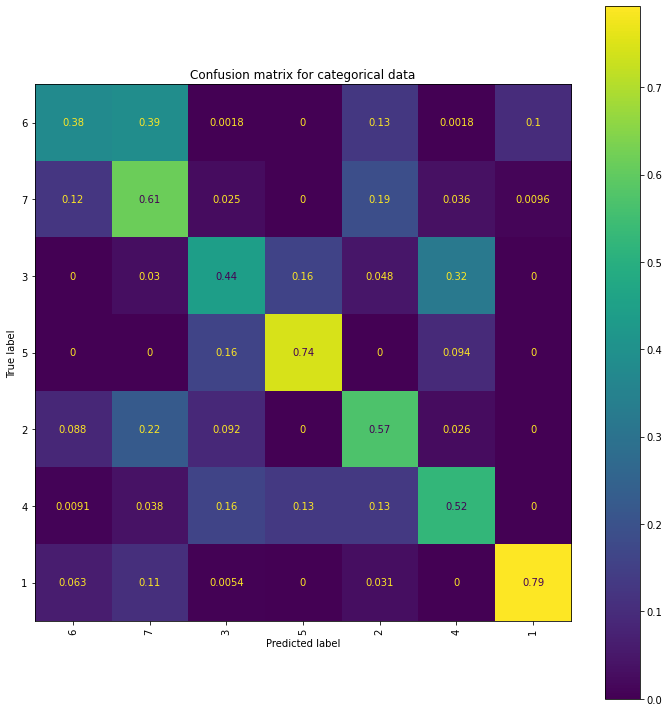

AUC =  0.7558770580607297
Balanced Accuracy =  0.5810484364987483
Cohen Kappa score =  0.514255516235161
Matthews Corrcoef =  0.5161994740321826
Hinge Loss =  0.8328042328042328


In [317]:
svm = LinearSVC(dual=False).fit(X_train_small,y_train)
y_pred = svm.predict(X_test_small)
y_pred = pd.Series(y_pred,index = y_test)

## Confusion 
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.savefig(RES_PATH+"figures/confusion_matrix_cat_ANOVA")
plt.tight_layout()
plt.show()
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", hinge_loss(y_test,Y_pred))

Comparison before/after : 

before


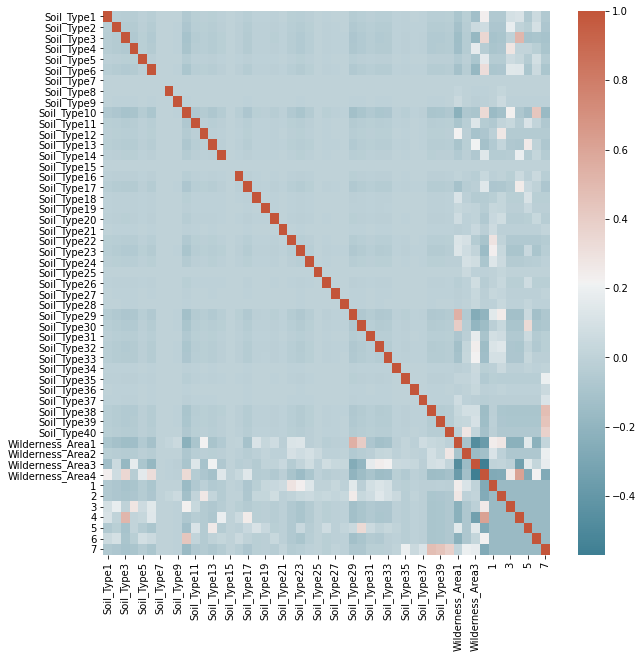

Feature selection : 


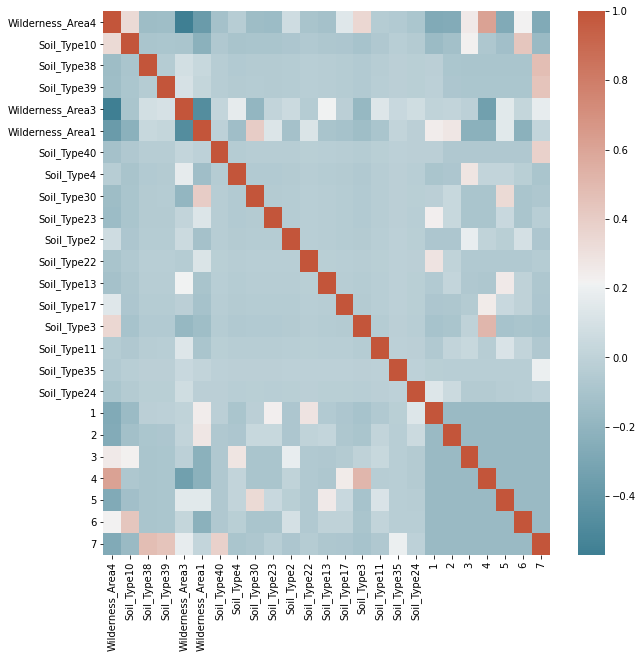

PCA projection (20) :


FileNotFoundError: [Errno 2] No such file or directory: '/home/clairegayral/Documents/openclassroom/res/P8/X_cat_PCA20.csv'

In [318]:
print("before")
tmp = pd.concat((X.loc[:,cat_vars],pd.get_dummies(y)), axis =1)
corr = tmp.corr().fillna(0)
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
plt.figure(figsize=(10,10))
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

print("Feature selection : ")
X_new_feature_selection = pd.read_csv(RES_PATH+"X_cat_feature_selection.csv", index_col=0)
tmp = pd.concat((X_new_feature_selection,pd.get_dummies(y)), axis =1)
corr = tmp.corr().fillna(0)
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
plt.figure(figsize=(10,10))
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

## PCA Cat projection : 
print("PCA projection ("+ str(n_compo)+") :", )
X_proj = pd.read_csv(RES_PATH+"X_cat_PCA20.csv", index_col=0)
tmp = pd.concat((X_proj,pd.get_dummies(y)), axis =1)
corr = tmp.corr()
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
plt.figure(figsize=(10,10))
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

possible improvments here :
* target Encoding : https://contrib.scikit-learn.org/category_encoders/targetencoder.html // https://maxhalford.github.io/blog/target-encoding/

<a id ="section2"></a>
<a id ="section2.1"></a>

[back to menu](#menu)

# 2. Exploratory Analysis for Numerical data 
Let's now tackle the 10 numerical variables : 

## 2.1 Univariate analysis

In [319]:
X_num = X.loc[:,num_vars]
X_numy = pd.concat((X_num, y), axis = 1)

X_num.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [320]:
palette = sns.color_palette("tab10", len(y.unique()))
# sns.pairplot(X_numy, hue = "Cover_Type", palette = palette, kind="kde")
# plt.savefig(RES_PATH + "figures/"+"pairplot_kde_colored_by_output")
# sns.pairplot(X_num)
# plt.savefig(RES_PATH + "figures/"+"pairplot")
plt.show()

<a id ="section2.2"></a>
[back to menu](#menu)
## 2.B Multivariate analysis

In [321]:
my_std = StandardScaler().fit(X_num)
X_num_std = pd.DataFrame(my_std.transform(X_num), index=X_num.index, columns=X_num.columns)

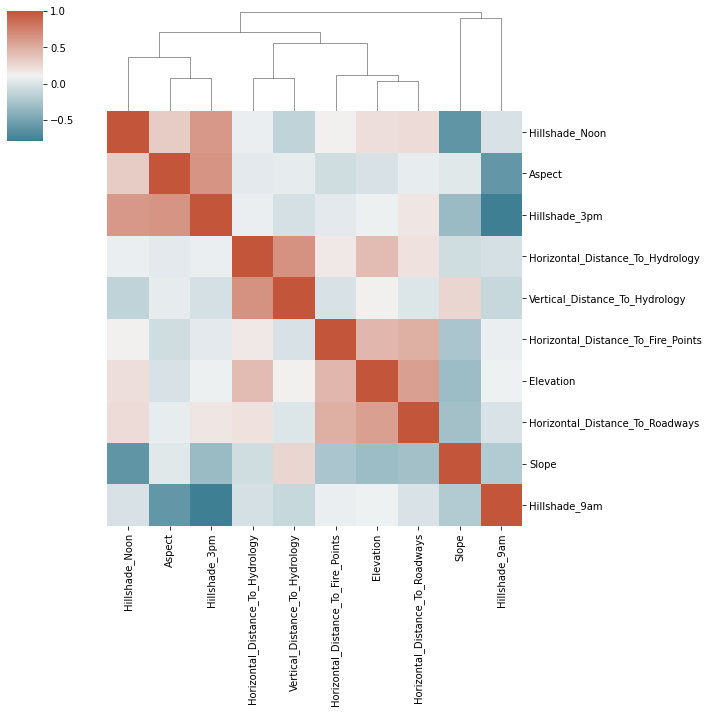

In [322]:
corr_std = X_num_std.corr()
cg = sns.clustermap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
cg.ax_row_dendrogram.set_visible(False)
plt.savefig(RES_PATH + "figures/"+"num_correlation_matrix")


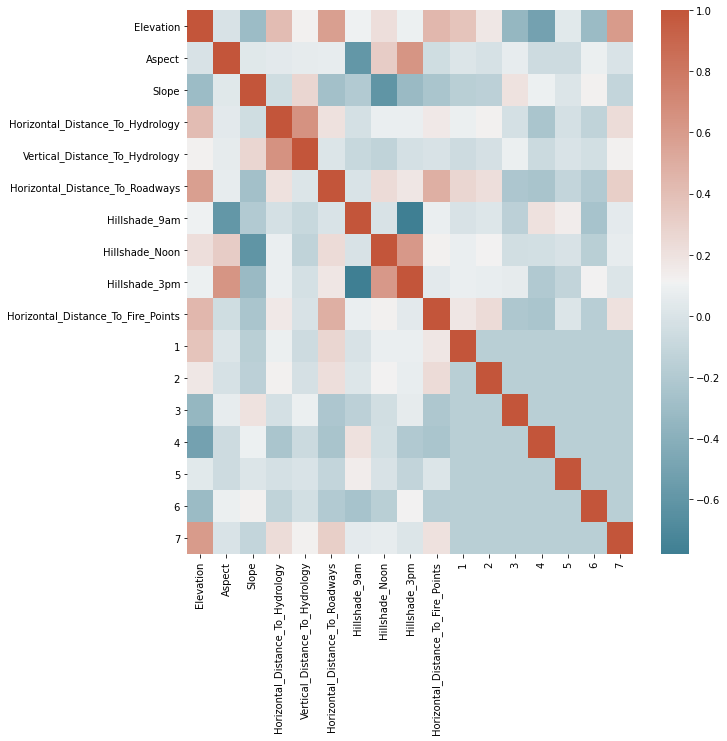

In [323]:
plt.figure(figsize=(10,10))
corr_std =(pd.concat((X_num,pd.get_dummies(y)), axis =1)).corr()
sns.heatmap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
plt.savefig(RES_PATH + "figures/"+"num_correlation_matrix_with_dummies")


In [324]:
num_vars

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

Some variables are correlated and anti-correlated. A selection of variables will be mandatory. 
### Numerical VS output : 

In [325]:
def eta_squared(cat_var,num_var):
    global_mean = num_var.mean()
    modes = []
    for j in cat_var.unique():
        num_in_j = num_var[cat_var==j]
        modes.append({'ni': len(num_in_j),
                        'mode_mean': num_in_j.mean()})
    SCT = sum([(num_in_j-global_mean)**2 for num_in_j in num_var])
    SCE = sum([c['ni']*(c['mode_mean']-global_mean)**2 for c in modes])
    return SCE/SCT

Hillshade_Noon


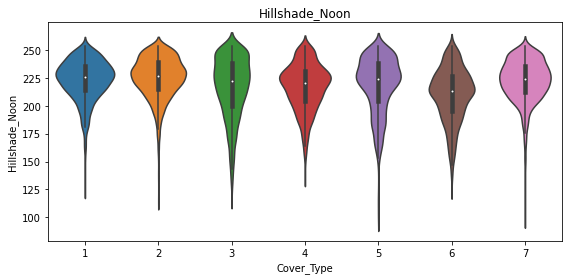

ANOVA $\eta^2$ =  0.04474456007955787
Aspect


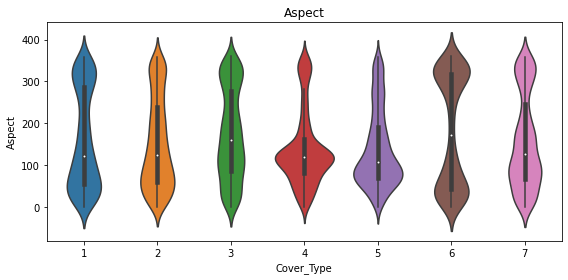

ANOVA $\eta^2$ =  0.018813757646954372
Hillshade_3pm


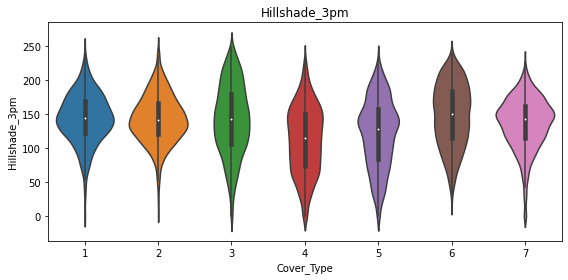

ANOVA $\eta^2$ =  0.07281154853882023
Horizontal_Distance_To_Hydrology


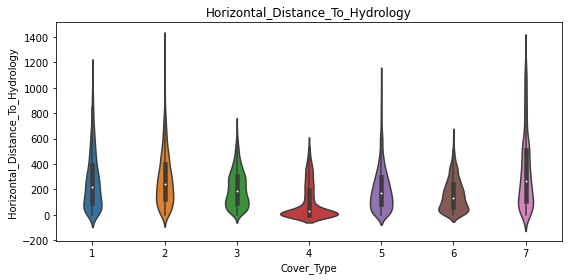

ANOVA $\eta^2$ =  0.12985568777310916
Vertical_Distance_To_Hydrology


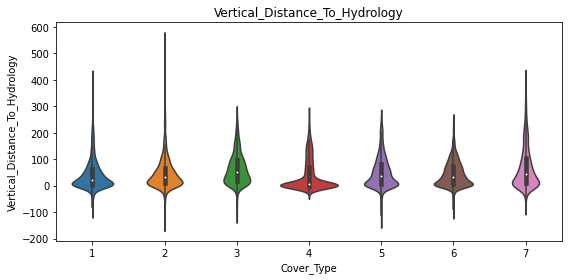

ANOVA $\eta^2$ =  0.02881593654802337
Horizontal_Distance_To_Fire_Points


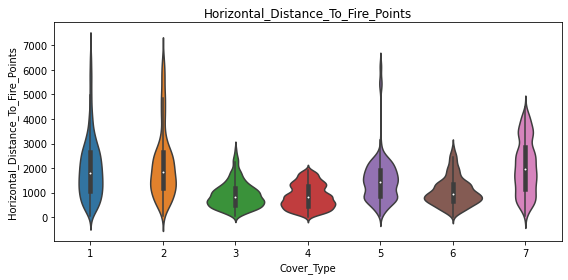

ANOVA $\eta^2$ =  0.2285250213910938
Elevation


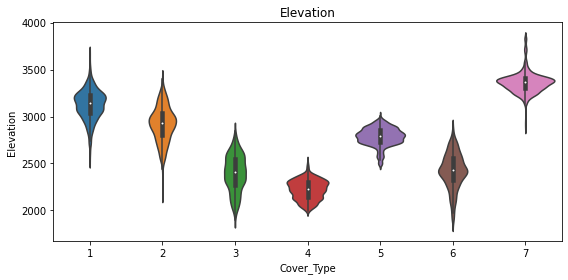

ANOVA $\eta^2$ =  0.8657343078655694
Horizontal_Distance_To_Roadways


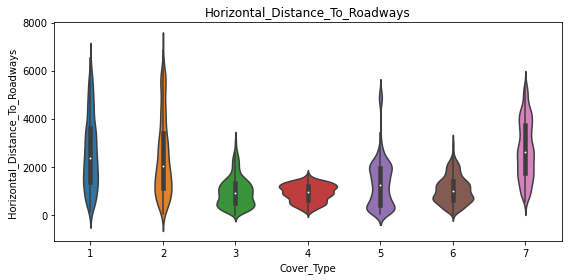

ANOVA $\eta^2$ =  0.3268578045235361
Slope


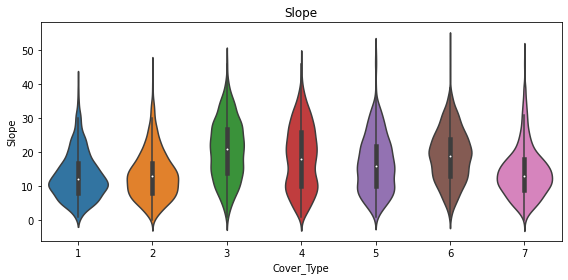

ANOVA $\eta^2$ =  0.10701277568309729
Hillshade_9am


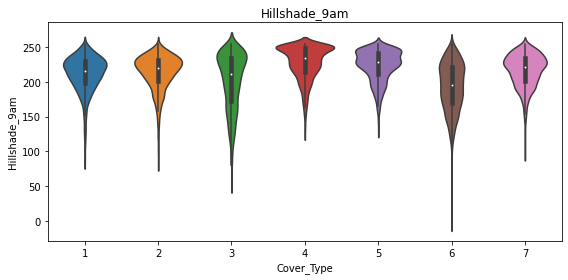

ANOVA $\eta^2$ =  0.13055356928190062


In [326]:
eta_num = pd.Series(dtype='float64',name="eta")
for num_v in X_num_std.columns[cg.dendrogram_col.reordered_ind] : 
    print(num_v)
    plt.figure(figsize=(8,4))
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
#     plt.yscale("log")
    plt.title(num_v)
    plt.tight_layout()
    plt.savefig(RES_PATH+"figures/num_ANOVA_"+num_v)
    plt.show()
    eta = eta_squared(y, X_num.loc[:,num_v])
    print("ANOVA $\eta^2$ = ",eta)
    eta_num.loc[num_v] = eta 

In [327]:
eta_num

Hillshade_Noon                        0.044745
Aspect                                0.018814
Hillshade_3pm                         0.072812
Horizontal_Distance_To_Hydrology      0.129856
Vertical_Distance_To_Hydrology        0.028816
Horizontal_Distance_To_Fire_Points    0.228525
Elevation                             0.865734
Horizontal_Distance_To_Roadways       0.326858
Slope                                 0.107013
Hillshade_9am                         0.130554
Name: eta, dtype: float64

The variable "Elevation" seems to separate the soil covers well. The other variables do not seem to be discriminating.

<a id ="section2.3"></a>
<a id ="section2.3.1"></a>
[back to menu](#menu)

## 2.C Feature Engineering

Let's follow the same methodology, adapted to numerical features : 
<!-- * https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py -->


### 2.C.a Classical preprocess

#### Drop constant variables :
First of all, let's check the standard deviation of each variable : 

In [328]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1))
sel.fit(X_num)
len(sel.get_feature_names_out())

10

There are no not-variant variable. 

#### Train test split : 
The numerical data have already been center-reduced (before correlation matrix heatmap). 
Let's split data for feature engineering of numerical variables :

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X_num_std, y, random_state=10)
## same random state to be consistent with the first part :) 

#### A classifier predictor of cover type 
To follow the evolution of prediction while engineering feature, we will need a basic model (to be improved) 

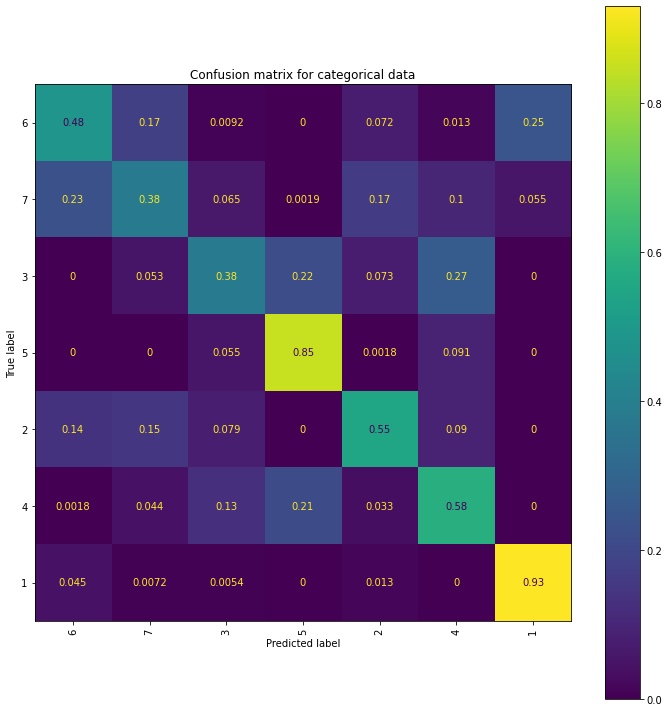

In [338]:
svm = LinearSVC(dual=False).fit(X_train,y_train)
y_pred = svm.predict(X_test)
y_pred = pd.Series(y_pred,index = y_test)
## Confusion 
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/num_confusion_matrix")
plt.show()

<!-- <a id ="section2.3.2"></a>
[back to menu](#menu) -->

### 1.C.b Feature Selection : 

Let's call again the [Feature selection User Guide of sklearn](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection). As we now tackle numerical data, we can call the RFE sklearn process for feature selection : 

#### Feature selection with RFE :

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py


Optimal number of features : 10


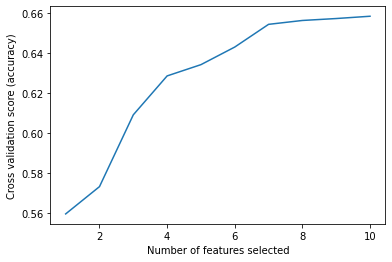

In [339]:
## https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(4),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
mean_score = rfecv.cv_results_["mean_test_score"]
plt.plot(
    range(min_features_to_select, len(mean_score) + min_features_to_select),
    mean_score
)
plt.show()

One can also call the same selection process (anova then SVM) as presented for categorical variables

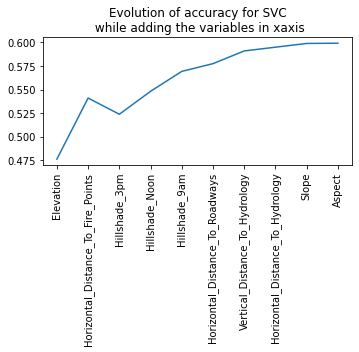

the first model is given only by the variable Elevation


In [340]:
score = []
for k in np.arange(9,0,-1):
    anova_filter = SelectKBest(f_classif, k=k)
    clf = LinearSVC(multi_class = "ovr", dual=False)

    anova_svm = make_pipeline(anova_filter, clf)
    anova_svm.fit(X_train, y_train)
    score.append(anova_svm.score(X_test,y_test))
remove_order =  [removed for removed in anova_svm[:-1].feature_names_in_ 
                  if removed not in anova_svm[:-1].get_feature_names_out()]
# remove_order[-1] = anova_svm[:-1].get_feature_names_out()[0]+ " \n "+remove_order[-1] 

### SVC just with all variables :
clf = LinearSVC(multi_class = "ovr", dual=False)
clf.fit(X_train,y_train)
score.insert(0, clf.score(X_test,y_test))
## add the first one in names 
var = anova_svm[:-1].get_feature_names_out()
remove_order.append(var[0])

## plot :
plt.figure(figsize=(5,5))
plt.title("Evolution of accuracy for SVC\n while adding the variables in xaxis")
plt.plot(remove_order[::-1], score[::-1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(RES_PATH + "figures/num_feature_selection")
plt.show()

print("the first model is given only by the variable", 
     anova_svm[:-1].get_feature_names_out()[0])

In [341]:
num_var_selected = [var for var in num_vars if var not in ["Slope","Aspect"]]
X_num_select = X.loc[:,num_var_selected]
X_num_select.to_csv(RES_PATH+"X_num_feature_selection.csv")

Visibly, one of the variable can be removed : 

In [342]:
# chi2, f_classif
anova_filter = SelectKBest(f_classif, k=9)
clf = LinearSVC(multi_class = "ovr", dual=False)

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=True))
print("The 1st variable to be removed is ",
      [removed for removed in anova_svm[:-1].feature_names_in_ 
      if removed not in anova_svm[:-1].get_feature_names_out()])

              precision    recall  f1-score   support

           1       0.54      0.49      0.52       543
           2       0.45      0.36      0.40       523
           3       0.51      0.38      0.43       505
           4       0.68      0.85      0.76       562
           5       0.61      0.56      0.59       544
           6       0.52      0.58      0.55       549
           7       0.76      0.92      0.83       554

    accuracy                           0.60      3780
   macro avg       0.58      0.59      0.58      3780
weighted avg       0.58      0.60      0.59      3780

The 1st variable to be removed is  ['Aspect']


In [345]:
X_train.loc[:,anova_svm[:-1].get_feature_names_out()]

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Id,,,,,,,,,
6240,-0.972845,0.413835,-0.881597,-0.670775,-0.400765,-1.364657,1.317228,1.697576,-0.553821
14796,1.782957,0.058958,0.775006,2.611534,-0.383407,-0.350268,-0.656351,0.019785,0.178973
5740,-1.025519,0.532127,-0.567414,-0.229868,-0.196241,1.056787,0.483939,-0.699268,-0.632009
6792,0.083027,0.768711,-0.167544,0.684606,-0.503405,-1.201046,1.492657,1.566839,0.293529
8456,0.504418,-1.242255,2.174551,1.827699,0.500351,0.533231,0.571653,0.041574,0.136242
...,...,...,...,...,...,...,...,...,...
11634,0.245837,-1.005671,0.494145,0.047740,0.246016,-0.121213,0.264652,0.390206,0.159881
1345,0.439773,-1.478839,-1.081532,-0.834074,-0.434727,0.336898,0.483939,0.172311,0.765390
12816,-1.317619,1.596756,-0.053296,1.207163,-0.732835,-2.215435,-1.752784,0.608101,-0.489269


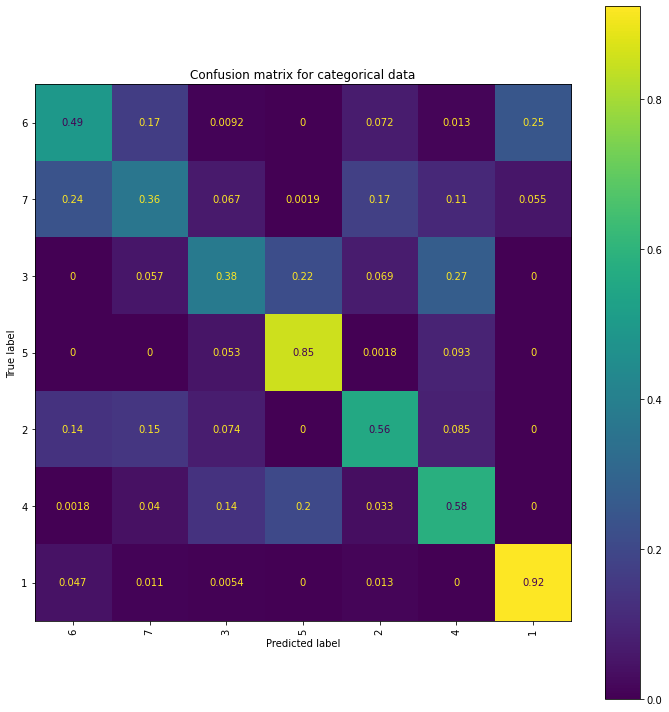

In [346]:
svm = LinearSVC(dual=False).fit(X_train.loc[:,anova_svm[:-1].get_feature_names_out()],y_train)
y_pred = svm.predict(X_test.loc[:,anova_svm[:-1].get_feature_names_out()])
y_pred = pd.Series(y_pred,index = y_test)
## Confusion 
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_confusion_matrix_9selected")
plt.show()

<!-- <a id ="section2.3.2"></a>
[back to menu](#menu)

### 1.C.c Reduction of dimension :  -->

<a id ="section2.3.2"></a>
[back to menu](#menu)

### 1.C.b Reduction of dimension : 

[Factor Analysis example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py), and [an article](https://www.datacamp.com/community/tutorials/introduction-factor-analysis) to read about FA.

In [348]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.decomposition import FactorAnalysis

pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 6, 8, 10]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(),  FactorAnalysis()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [FeatureAgglomeration()],
        "reduce_dim__n_clusters": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(f_classif)], ## chi2 need non neg matrix
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "FA", "hclust", "KBest(chi2)"]

grid = GridSearchCV(pipe, cv=5, n_jobs=8, param_grid=param_grid)
# grid.fit(X_train, y_train)
# with open(RES_path+"CV_gridsearch_models/"+"num_reduc_dim"+".pkl", "wb") as f :
#     pickle.dump(grid, f, pickle.HIGHEST_PROTOCOL)

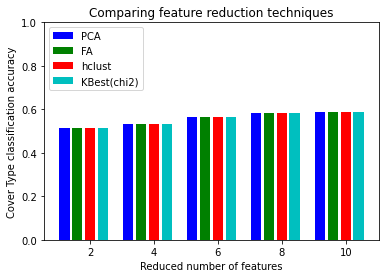

In [350]:

with open(RES_PATH+"CV_gridsearch_models/"+"num_reduc_dim"+".pkl", "rb") as f :
    grid= pickle.load(f)

    
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Cover Type classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

Les projections par pondération : 

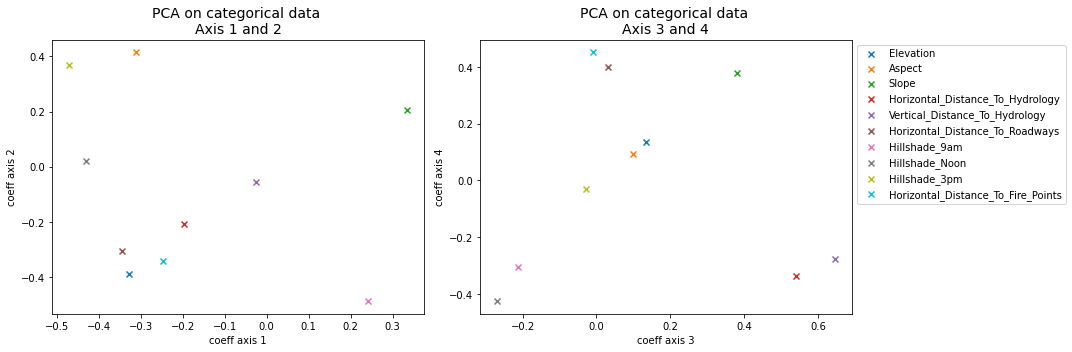

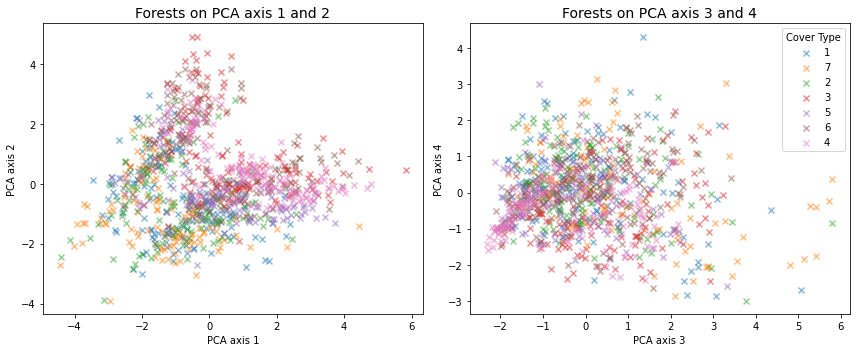

In [351]:
X_ = StandardScaler().fit_transform(X_train)
X_ = pd.DataFrame(X_, index=X_train.index, columns=X_train.columns)
my_meth = PCA(n_components=4).fit(X_)
my_meth_name = "PCA"
# my_meth = FactorAnalysis(n_components=4).fit(X_)
# my_meth_name = "FA"

plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_, my_meth, palette_name = "tab10")
plt.legend(ncol=1, bbox_to_anchor= (1,1))
plt.tight_layout()
plt.show()


X_proj = pd.DataFrame(my_meth.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.tight_layout()
plt.show()

In [352]:
hclust = FeatureAgglomeration(n_clusters=4).fit(X_train)
for k in range(4) :
    idx_bool = hclust.labels_ == k
    print(k, my_meth.feature_names_in_[idx_bool])

0 ['Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology']
1 ['Aspect' 'Hillshade_Noon' 'Hillshade_3pm']
2 ['Elevation' 'Horizontal_Distance_To_Roadways'
 'Horizontal_Distance_To_Fire_Points']
3 ['Hillshade_9am']


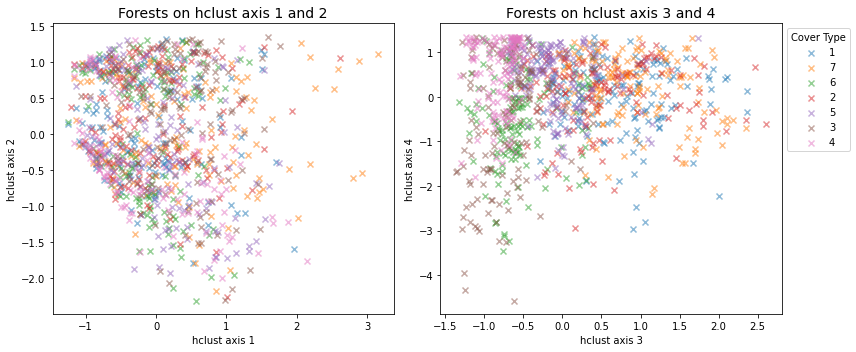

In [353]:
X_proj = pd.DataFrame(index=X_train.index)
for k in range(4) :
    idx_bool = hclust.labels_ == k
    cluster_vars = my_meth.feature_names_in_[idx_bool]
    X_proj.loc[:,"ax_"+str(k+1)] = X_train.loc[:, cluster_vars].mean(axis=1)
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "hclust", labels)
plt.tight_layout()
plt.show()

<a id ="section2.3.3"></a>
[back to menu](#menu)

## 2.C.c Create variable "by hand"

The result of these projections are not satisfactory because too much information is lost. For example, the variable "elevation" separates the soils very well, it should not be noisy by weighting it with other variables. On the other hand, it is quite natural to create some variables from existing ones. For example, it is not so much the level of sunshine that discriminates the soil classes, but the difference in sunshine during the same day. 


dt_shade_9am-Noon
ANOVA $\eta^2$ =  0.06401793162107874
dt_shade_Noon-3pm
ANOVA $\eta^2$ =  0.12735474246867062
dt_shade_3pm-9am
ANOVA $\eta^2$ =  0.09681744773120823


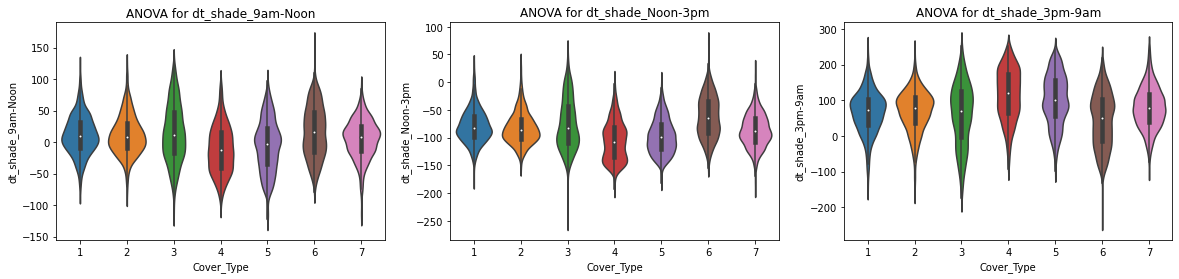

Hillshade_Noon
ANOVA $\eta^2$ =  0.04474456007955787
Hillshade_3pm
ANOVA $\eta^2$ =  0.07281154853882023
Hillshade_9am
ANOVA $\eta^2$ =  0.13055356928190062


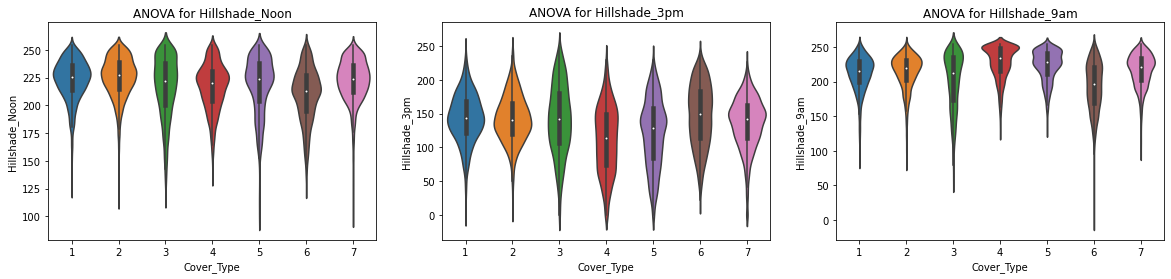

In [354]:
shade = X.loc[:,["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Hillshade_9am"]]
shade_delta = shade.diff(axis=1).iloc[:,1:]
shade_delta.loc[:,"Cover_Type"] = y.loc[shade_delta.index]
shade_delta.loc[:,"Slope"] = X.loc[:,"Slope"]
shade_delta.loc[:,"Aspect"] = X.loc[:,"Aspect"]

shade_delta = shade_delta.rename({"Hillshade_Noon": "dt_shade_9am-Noon","Hillshade_3pm" : "dt_shade_Noon-3pm",
                                  "Hillshade_9am": "dt_shade_3pm-9am"}, axis=1)
tmp = ["dt_shade_9am-Noon","dt_shade_Noon-3pm","dt_shade_3pm-9am"]
plt.figure(figsize=(20,4))
for i in range(3) :
    num_v = tmp[i]
    plt.subplot(1,3,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = shade_delta)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,shade_delta.loc[:,num_v]))
plt.show()

plt.figure(figsize=(20,4))
tmp2 = ["Hillshade_Noon", "Hillshade_3pm", "Hillshade_9am"]
for i in range(3) :
    num_v = tmp2[i]
    plt.subplot(1,3,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,X_numy.loc[:,num_v]))
plt.show()

# sns.heatmap(shade_delta.drop("Cover_Type", axis=1).corr())

In [355]:
# palette = sns.color_palette("tab10", 7)
# sns.pairplot(shade_delta, hue="Cover_Type", palette = palette)

These are therefore variables that do not separate the classes well. There is no point in managing so many of them:

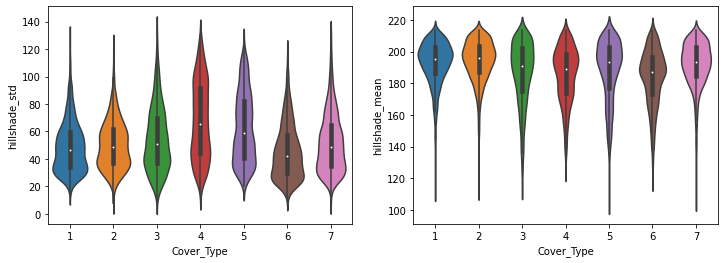

hillshade_std ANOVA $\eta^2$ =  0.10123569092567382
hillshade_mean ANOVA $\eta^2$ =  0.04718545629950625

Hillshade_9am  ANOVA $\eta^2$ =  0.13055356928190062
Hillshade_Noon  ANOVA $\eta^2$ =  0.04474456007955787
Hillshade_3pm  ANOVA $\eta^2$ =  0.07281154853882023


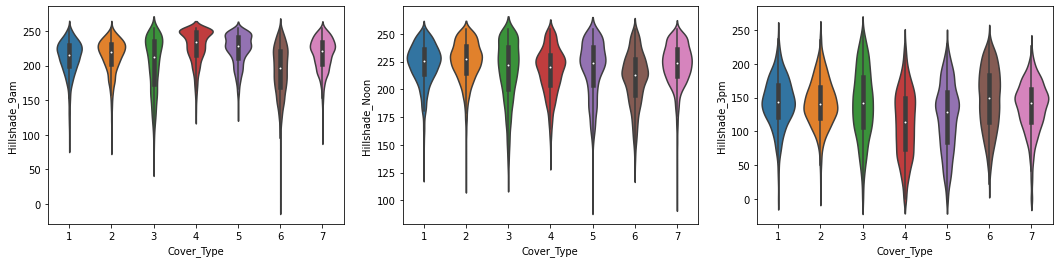

,Hillshade_3pm,Hillshade_Noon,Hillshade_9am,hillshade_std,hillshade_mean
Hillshade_3pm,1.000000,0.614526,-0.779965,-0.851726,0.702108
Hillshade_Noon,0.614526,1.000000,-0.013712,-0.391153,0.984654
Hillshade_9am,-0.779965,-0.013712,1.000000,0.702563,-0.107990
hillshade_std,-0.851726,-0.391153,0.702563,1.000000,-0.516553
hillshade_mean,0.702108,0.984654,-0.107990,-0.516553,1.000000


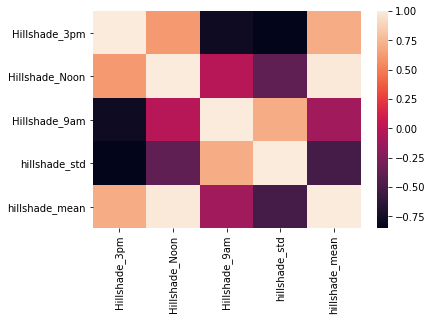

In [356]:
hillshade_vars = ["Hillshade_3pm","Hillshade_Noon", "Hillshade_9am"]
shade = X.loc[:,hillshade_vars]
shade.loc[:,"hillshade_std"] = shade.std(axis=1)
shade.loc[:,"hillshade_mean"] = shade.loc[:,hillshade_vars].mean(axis=1)
shade.loc[:,"Cover_Type"] = y
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.violinplot(y = "hillshade_std", x = "Cover_Type", data = shade)
plt.subplot(1,2,2)
sns.violinplot(y = "hillshade_mean", x = "Cover_Type", data = shade)
plt.show()
print("hillshade_std ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,"hillshade_std"]))
print("hillshade_mean ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,"hillshade_mean"]))
print()
plt.figure(figsize=(18,4))
for i,var in enumerate(["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm"]) :
    plt.subplot(1,3,i+1)
    sns.violinplot(y = var, x = "Cover_Type", data = shade)
    print(var, " ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,var]))
plt.show()

sns.heatmap(shade.drop("Cover_Type", axis=1).corr())
shade.drop("Cover_Type", axis=1).corr()

Slope  ANOVA $\eta^2$ =  0.10701277568309729
Elevation  ANOVA $\eta^2$ =  0.8657343078655694
Aspect  ANOVA $\eta^2$ =  0.018813757646954372


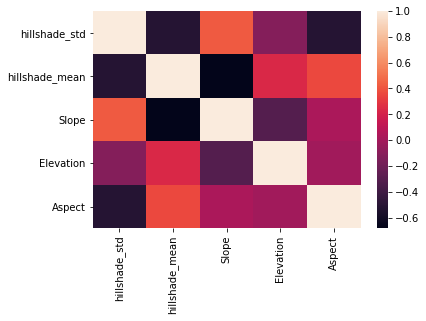

,hillshade_std,hillshade_mean,Slope,Elevation,Aspect
hillshade_std,1.000000,-0.516553,0.419209,-0.121928,-0.514570
hillshade_mean,-0.516553,1.000000,-0.682934,0.233978,0.358146
Slope,0.419209,-0.682934,1.000000,-0.312640,0.028148
Elevation,-0.121928,0.233978,-0.312640,1.000000,-0.011096
Aspect,-0.514570,0.358146,0.028148,-0.011096,1.000000


In [357]:
shade.loc[:,"Slope"] = X.loc[:,"Slope"]
shade.loc[:,"Elevation"] = X.loc[:,"Elevation"]
shade.loc[:,"Aspect"] = X.loc[:,"Aspect"]

for var in ["Slope","Elevation","Aspect"] :
    print(var, " ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,var]))
plt.show()

sns.heatmap(shade[["hillshade_std","hillshade_mean","Slope","Elevation","Aspect"]].corr())
plt.show()
shade[["hillshade_std","hillshade_mean","Slope","Elevation","Aspect"]].corr()

The Slope variable is very strongly correlated to the new variable created. I don't keep it. Same for Aspect variable. 

Also, it is not the horizontal and vertical distance that will be of interest, but the total distance and the variation between the horizontal and vertical component:

tot_dist
ANOVA $\eta^2$ =  0.15993331300833433
h_dist
ANOVA $\eta^2$ =  0.12985568777310916
quotient_v_h
ANOVA $\eta^2$ =  0.18674415354887325
water_above
ANOVA $\eta^2$ =  0.010713147072353506


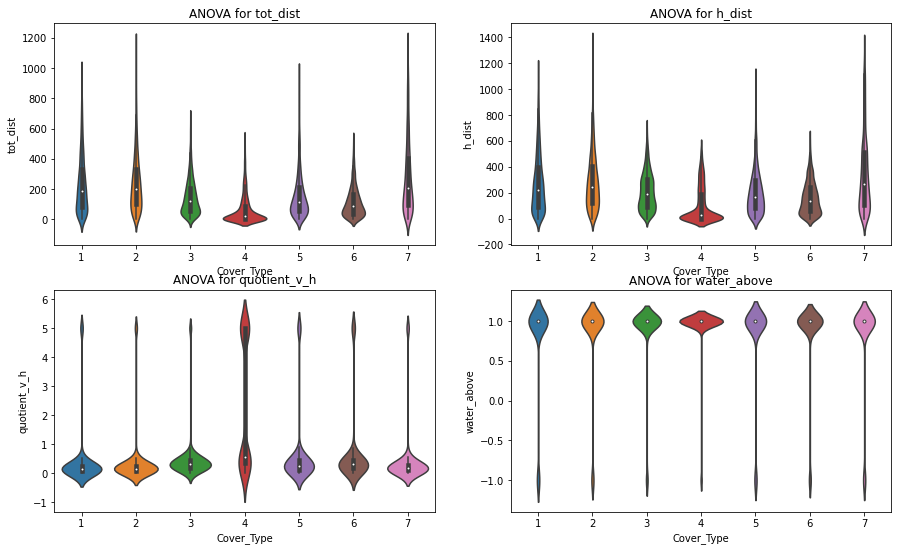

Vertical_Distance_To_Hydrology
ANOVA $\eta^2$ =  0.02881593654802337
Horizontal_Distance_To_Hydrology
ANOVA $\eta^2$ =  0.12985568777310916


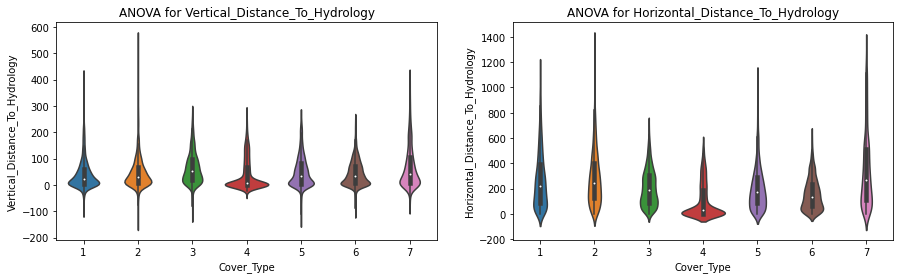

In [358]:
v = X_num.loc[:, "Vertical_Distance_To_Hydrology"]
h = X_num.loc[:, "Horizontal_Distance_To_Hydrology"]

hydrology = pd.DataFrame(abs(v - h), columns=["tot_dist"])
hydrology.loc[:,"h_dist"] = h

## quotient h/v :
hydrology.loc[:,"quotient_v_h"] = abs(v/h)
hydrology.loc[:,"quotient_v_h"] = hydrology.loc[:,"quotient_v_h"].fillna(5)

## are hydrology nearest point above or below ?
tmp = pd.Series(1, index=v.index)
tmp[v[v<0].index] = -1
hydrology.loc[:,"water_above"] = tmp
tmp = hydrology.columns

## add output :
hydrology.loc[:,"Cover_Type"] = y

## plot 
plt.figure(figsize=(15,9))
for i in range(4) :
    num_v = tmp[i]
    plt.subplot(2,2,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = hydrology)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,hydrology.loc[:,num_v]))
plt.show()

plt.figure(figsize=(15,4))
for i in range(2) :
    num_v = ["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Hydrology"][i]
    plt.subplot(1,2,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,X_numy.loc[:,num_v]))
plt.show()

Only the variable "horizontal distance" will be kept, because it separates the classes better. It is renamed d_hydro 

Horizontal_Distance_To_Roadways  ANOVA $\eta^2$ =  0.3268578045235361
Horizontal_Distance_To_Fire_Points  ANOVA $\eta^2$ =  0.2285250213910938
Elevation  ANOVA $\eta^2$ =  0.8657343078655694
Horizontal_Distance_To_Hydrology  ANOVA $\eta^2$ =  0.12985568777310916


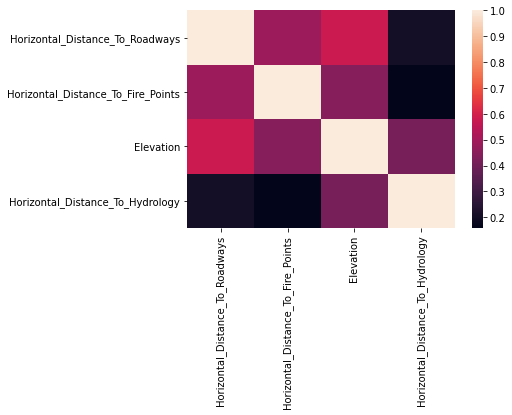

,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Elevation,Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Roadways,1.000000,0.486386,0.578659,0.203397
Horizontal_Distance_To_Fire_Points,0.486386,1.000000,0.443563,0.158817
Elevation,0.578659,0.443563,1.000000,0.412712
Horizontal_Distance_To_Hydrology,0.203397,0.158817,0.412712,1.000000


In [359]:
position = X.loc[:,["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points",
                    "Elevation", "Horizontal_Distance_To_Hydrology"]]
dpostion = position.diff(axis=1).iloc[:,1:]
dpostion.loc[:,"Cover_Type"] = y.loc[shade_delta.index]

for var in ["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points",
                    "Elevation", "Horizontal_Distance_To_Hydrology"] :
    print(var, " ANOVA $\eta^2$ = ",  eta_squared(y,position.loc[:,var]))
plt.show()

sns.heatmap(position[["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points",
                    "Elevation", "Horizontal_Distance_To_Hydrology"]].corr())
plt.show()
position.corr()

In [360]:
X_ = X_train.loc[:,["Horizontal_Distance_To_Roadways",
                    "Horizontal_Distance_To_Fire_Points",
                    "Horizontal_Distance_To_Hydrology"]]
std = StandardScaler().fit(X_)
X_ = pd.DataFrame(std.transform(X_), index=X_.index, columns=X_.columns)
test = X_test.loc[:,["Horizontal_Distance_To_Roadways",
                     "Horizontal_Distance_To_Fire_Points",
                     "Horizontal_Distance_To_Hydrology"]]
test = pd.DataFrame(std.transform(test), index=test.index, columns=test.columns)

pca = PCA(n_components=3).fit(X_)
X_proj = pd.DataFrame(pca.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,4)])
test_proj = pd.DataFrame(pca.transform(test), 
                      index = test.index, 
                      columns=["ax_"+str(k) for k in range(1,4)])

clf = LinearSVC(dual=False, max_iter=10000)
param_grid = {"C": [1, 10, 100, 1000, 10000]}
print("classif accuracy")

grid = GridSearchCV(clf, cv=5, n_jobs=8, param_grid=param_grid)
grid.fit(X_, y_train)
print("orginal data = ", grid.score(test, y_test))

for k in range(1,4) :
    grid = GridSearchCV(clf, cv=5, n_jobs=8, param_grid=param_grid)
    grid.fit(X_proj.iloc[:,:k], y_train)
    print("PCA",k,"components = ", grid.score(test_proj.iloc[:,:k], y_test))
print("\nExplained variance : \n",pd.Series(pca.explained_variance_ratio_, index = [ "ax_"+str(k) for k in range(1,pca.n_components+1)]))

pd.DataFrame(pca.components_, 
             index = [ "ax_"+str(k) for k in range(1,pca.n_components+1)],
             columns = pca.feature_names_in_
            )


classif accuracy
orginal data =  0.3055555555555556
PCA 1 components =  0.27724867724867724
PCA 2 components =  0.2896825396825397
PCA 3 components =  0.3055555555555556

Explained variance : 
 ax_1    0.529133
ax_2    0.297914
ax_3    0.172953
dtype: float64


,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology
ax_1,0.658105,0.640460,0.395865
ax_2,-0.221268,-0.338040,0.914751
ax_3,-0.719679,0.689595,0.080752


Let's project the whole dataset on PCA axis :

In [361]:
X_ = X_train.loc[:,["Horizontal_Distance_To_Roadways",
                    "Horizontal_Distance_To_Fire_Points",
                    "Horizontal_Distance_To_Hydrology"]]
std = StandardScaler().fit(X_)
X_ = pd.DataFrame(std.transform(X_), index=X_.index, columns=X_.columns)
test = X_test.loc[:,["Horizontal_Distance_To_Roadways",
                     "Horizontal_Distance_To_Fire_Points",
                     "Horizontal_Distance_To_Hydrology"]]
test = pd.DataFrame(std.transform(test), index=test.index, columns=test.columns)

pca = PCA(n_components=3).fit(X_)
loc_train_proj = pd.DataFrame(pca.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,4)])
loc_test_proj = pd.DataFrame(pca.transform(test), 
                      index = test.index, 
                      columns=["ax_"+str(k) for k in range(1,4)])

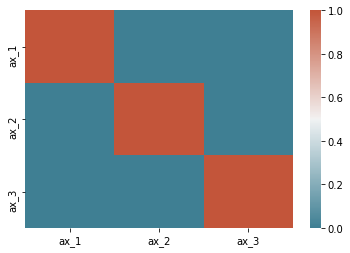

In [362]:
corr = X_proj.corr()
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )

In [363]:
## init with loc projection :
X_ = X.loc[train_index,["Horizontal_Distance_To_Roadways",
                    "Horizontal_Distance_To_Fire_Points",
                    "Horizontal_Distance_To_Hydrology"]]
std = StandardScaler().fit(X_)
X_ = pd.DataFrame(std.transform(X_), index=train_index, columns=X_.columns)
test = X_test.loc[test_index,["Horizontal_Distance_To_Roadways",
                     "Horizontal_Distance_To_Fire_Points",
                     "Horizontal_Distance_To_Hydrology"]]
test = pd.DataFrame(std.transform(test), index=test_index, columns=test.columns)

pca = PCA(n_components=3).fit(X_)
loc_train_proj = pd.DataFrame(pca.transform(X_), 
                      index = X_train.index, 
                      columns=["loc_ax_"+str(k) for k in range(1,4)])
loc_test_proj = pd.DataFrame(pca.transform(test), 
                      index = test.index, 
                      columns=["loc_ax_"+str(k) for k in range(1,4)])
X_new = pd.concat((loc_train_proj, loc_test_proj ))

## add elevation var
X_new.loc[:,"Elevation"] = X.loc[:,"Elevation"]

## add shade vars
shade = X.loc[:,["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Hillshade_9am"]]
X_new.loc[:,"hillshade_std"] = shade.std(axis=1)
X_new.loc[:,"hillshade_median"] = shade.median(axis=1)


X_new.to_csv(RES_PATH+"X_num_preprocessed.csv")

,loc_ax_1,loc_ax_2,loc_ax_3,Elevation,hillshade_std,hillshade_median
loc_ax_1,1.000000,0.083028,0.046416,0.428777,-0.124907,0.064891
loc_ax_2,0.083028,1.000000,0.009127,0.092261,-0.009653,-0.057446
loc_ax_3,0.046416,0.009127,1.000000,-0.097212,0.090003,0.047895
Elevation,0.428777,0.092261,-0.097212,1.000000,-0.141936,0.149510
hillshade_std,-0.124907,-0.009653,0.090003,-0.141936,1.000000,0.491329
hillshade_median,0.064891,-0.057446,0.047895,0.149510,0.491329,1.000000


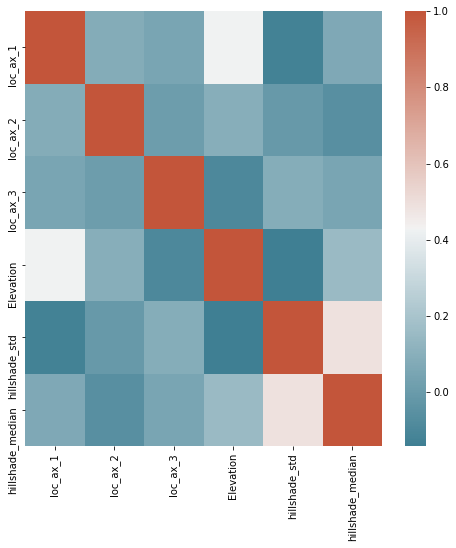

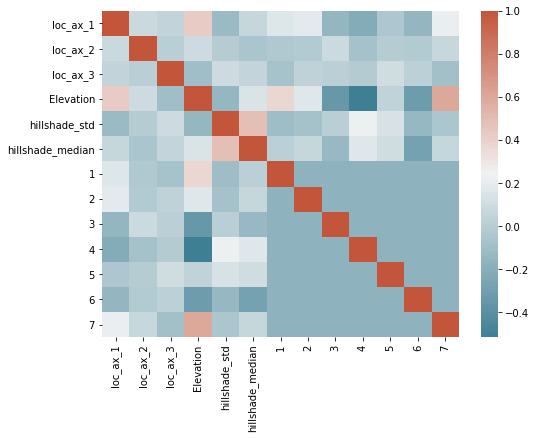

In [364]:
X_new = pd.DataFrame(StandardScaler().fit_transform(X_new),
                     index = X_new.index, columns=X_new.columns)
corr = X_new.corr()

plt.figure(figsize=(8,8))
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
plt.tight_layout
plt.savefig(RES_PATH + "figures/"+"num_correlation_matrix_preprocessed")


plt.figure(figsize=(8,6))
corr_std =(pd.concat((X_new,pd.get_dummies(y)), axis =1)).corr()
cg = sns.heatmap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# # cg.ax_row_dendrogram.set_visible(False)
# plt.savefig(RES_PATH + "figures/"+"correlation_matrix_dummies_preprocessed")

corr

In [201]:
## pca proj 
# X_new.to_csv(RES_PATH+"X_num_preprocessed_pca.csv")

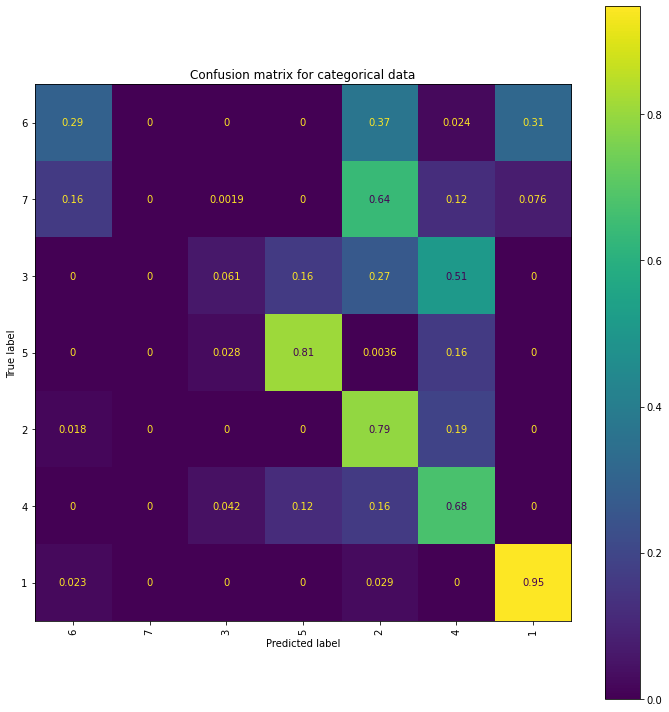

In [369]:
std = StandardScaler().fit(X_new.loc[train_index,:])
tmp_train = std.transform(X_new.loc[train_index,:])
tmp_test = std.transform(X_new.loc[test_index,:])

svm = LinearSVC(dual=False).fit(tmp_train,y_train)
y_pred = svm.predict(tmp_test)
y_pred = pd.Series(y_pred,index = y_test)
## Confusion 
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/num_confusion_matrix")
plt.show()

* TODO/idea : Run a "cover_type $\sim$ numerical_var" ANOVA to see how the regularization paths change. This would answer the question "does the numerical variable separate the classes well from the categorical variable?"

<a id ="section3"></a>
<a id ="section3.1"></a>
[back to menu](#menu)

# 3. Classification : 

First of all, let's recap the different preprocess on data that are to be used : 

## 3.A Calling preprocesses, get datasets  : 

In [95]:
## original dataset 
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

num_vars = ['Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
            'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
           ]
cat_vars = [var for var in X.columns if var not in num_vars]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
train_index = X_train.index
test_index = X_test.index


y = y.astype("str")
y_train = y.loc[train_index]
y_test = y.loc[test_index]

In [96]:
##cat vars 
X_cat = X.loc[:,cat_vars]
X_cat_feature_selection = pd.read_csv(RES_PATH+"X_cat_feature_selection.csv", index_col=0)
X_train_cat_proj = pd.read_csv(RES_PATH+"X_cat_PCA20_train.csv", index_col=0)
X_test_cat_proj = pd.read_csv(RES_PATH+"X_cat_PCA20_test.csv", index_col=0)
X_cat_proj = pd.concat((X_train_cat_proj,X_test_cat_proj))

## num vars 
X_num = df_train.loc[:,num_vars]
X_num_feature_selection = pd.read_csv(RES_PATH+"X_num_feature_selection.csv", index_col=0)
X_num_preprocessed = pd.read_csv(RES_PATH+"X_num_preprocessed.csv", index_col=0)

cte_cat_var = ['Soil_Type7', 'Soil_Type15']
X0 = X.drop(cte_cat_var, axis=1)
X1 = pd.concat((X_num_feature_selection, X_cat_feature_selection), axis = 1)
X2 = pd.concat((X_num_preprocessed, X_cat_feature_selection), axis = 1)
X3 = pd.concat((X_num_preprocessed, X_cat_proj), axis = 1)

In [97]:
## no preprocess at all : 
X0_train = X0.loc[train_index,:]
X0_test = X0.loc[test_index,:]
my_std0 = StandardScaler().fit(X0_train)
X0_train_std = pd.DataFrame(my_std0.transform(X0_train), 
                            index=X0_train.index, columns= X0_train.columns)
X0_test_std = pd.DataFrame(my_std0.transform(X0_test), 
                            index=X0_test.index, columns= X0_test.columns)

## num data cleaned, cat feature selected 
X1_train = X1.loc[train_index,:]
X1_test = X1.loc[test_index,:]
my_std1 = StandardScaler().fit(X1_train)
X1_train_std = pd.DataFrame(my_std1.transform(X1_train), 
                            index=X1_train.index, columns= X1_train.columns)
X1_test_std = pd.DataFrame(my_std1.transform(X1_test), 
                            index=X1_test.index, columns= X1_test.columns)

## num data cleaned, cat feature projected with PCA 
X2_train = X2.loc[train_index,:]
X2_test = X2.loc[test_index,:]
my_std2 = StandardScaler().fit(X2_train)
X2_train_std = pd.DataFrame(my_std2.transform(X2_train), 
                            index=X2_train.index, columns= X2_train.columns)
X2_test_std = pd.DataFrame(my_std2.transform(X2_test), 
                            index=X2_test.index, columns= X2_test.columns)

## num data cleaned and PCA, cat feature projected with PCA 
X3_train = X3.loc[train_index,:]
X3_test = X3.loc[test_index,:]
my_std3 = StandardScaler().fit(X3_train)
X3_train_std = pd.DataFrame(my_std3.transform(X3_train), 
                            index=X3_train.index, columns= X3_train.columns)
X3_test_std = pd.DataFrame(my_std3.transform(X3_test), 
                            index=X3_test.index, columns= X3_test.columns)

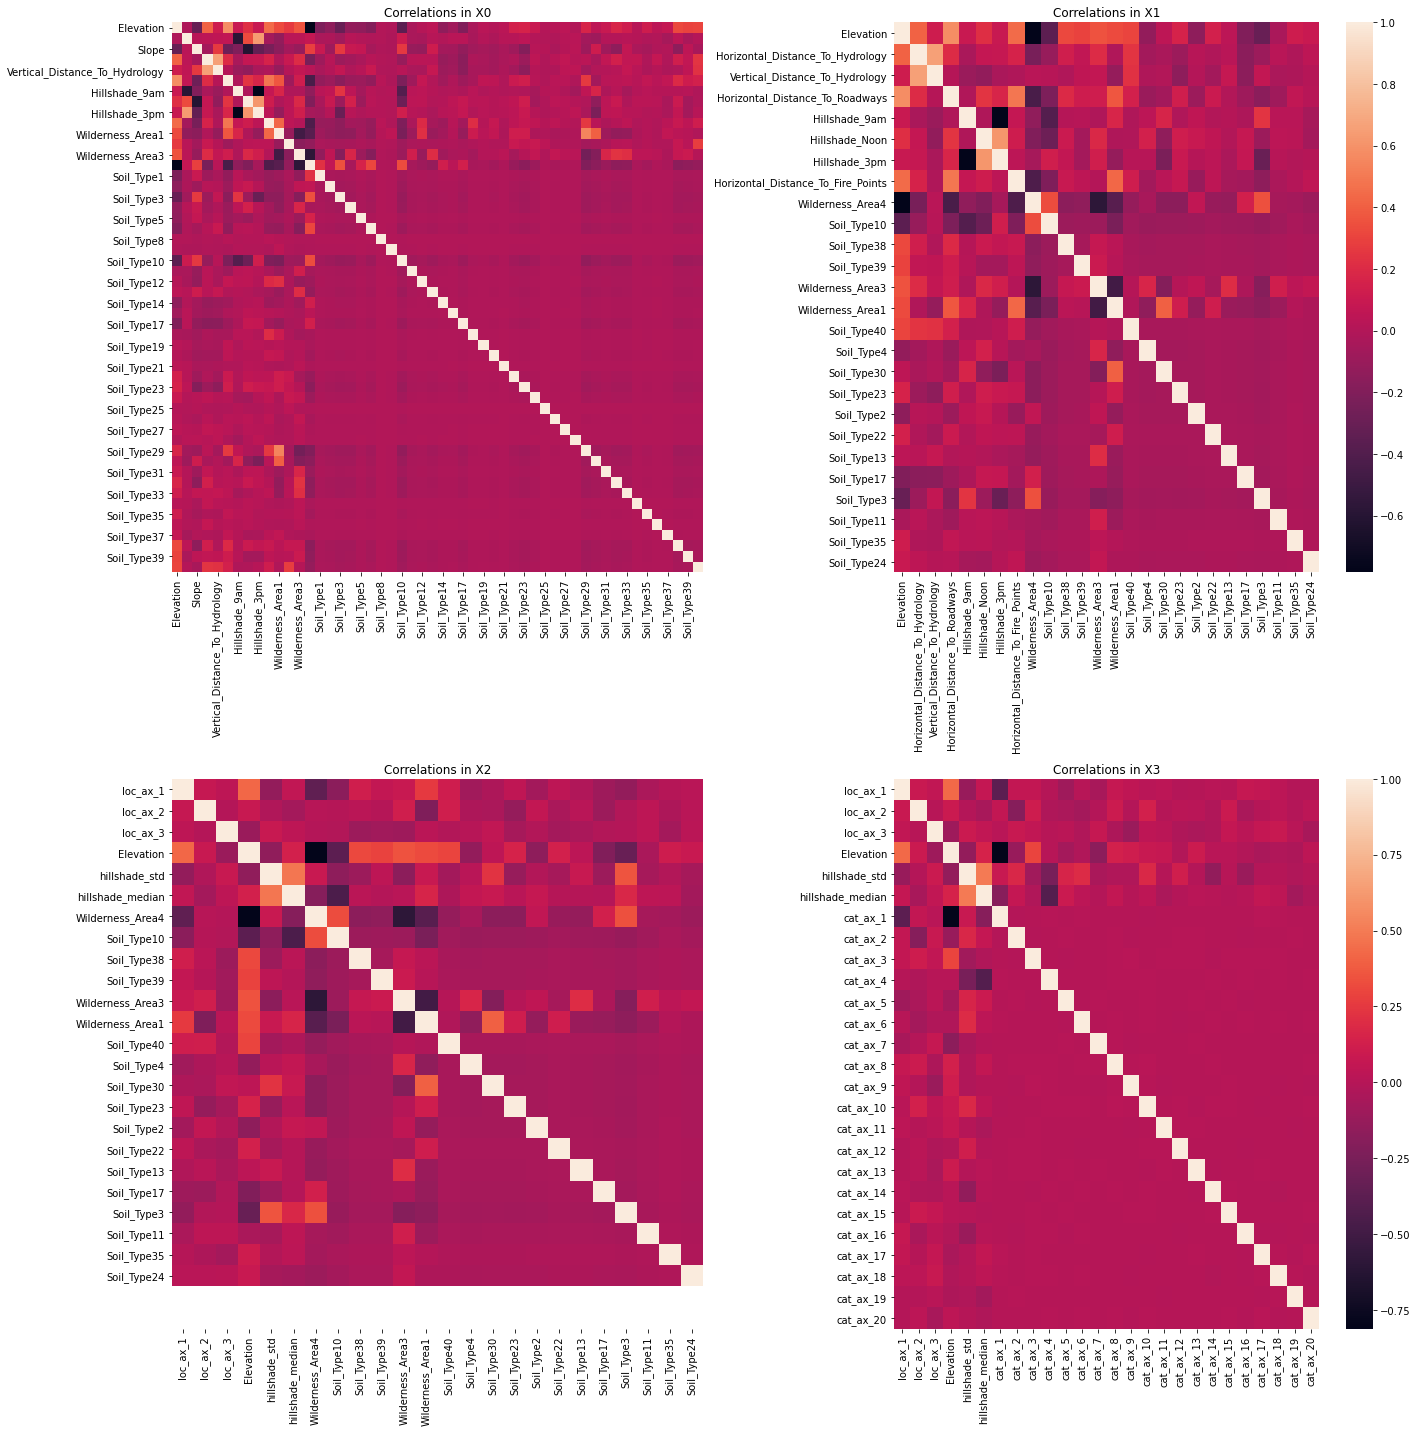

In [98]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20))

ax1.get_shared_y_axes().join(ax2,ax3,ax4)
g1 = sns.heatmap(X0.corr(),ax=ax1,cbar=False)
g1.set_title("Correlations in X0")
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(X1.corr(),ax=ax2)
g2.set_title("Correlations in X1")
g2.set_ylabel('')
g2.set_xlabel('')
# g2.set_yticks([])
g3 = sns.heatmap(X2.corr(),ax=ax3,cbar=False)
g3.set_title("Correlations in X2")
g3.set_ylabel('')
g3.set_xlabel('')
# g3.set_yticks([])
g4 = sns.heatmap(X3.corr(),ax=ax4)
g4.set_title("Correlations in X3")
g4.set_ylabel('')
g4.set_xlabel('')
# g4.set_yticks([])
# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
plt.tight_layout()
plt.show()

In [99]:
## Remove all correlation with pca projection : 
## for X0
n0_compo = X0.shape[1]
X0_pca = PCA(n_components=n0_compo).fit_transform(X0)
X0_pca = pd.DataFrame(X0_pca, index=X0.index, columns=["ax_"+str(k+0) for k in range(n0_compo)])
## num data cleaned, cat feature projected with PCA 
X0_pca_train = X0_pca.loc[train_index,:]
X0_pca_test = X0_pca.loc[test_index,:]

## for X1
n1_compo = X1.shape[1]
X1_pca = PCA(n_components=n1_compo).fit_transform(X1)
X1_pca = pd.DataFrame(X1_pca, index=X1.index, columns=["ax_"+str(k+1) for k in range(n1_compo)])
## num data cleaned, cat feature projected with PCA 
X1_pca_train = X1_pca.loc[train_index,:]
X1_pca_test = X1_pca.loc[test_index,:]

## for X2
n2_compo = X2.shape[1]
X2_pca = PCA(n_components=n2_compo).fit_transform(X2)
X2_pca = pd.DataFrame(X2_pca, index=X2.index, columns=["ax_"+str(k+2) for k in range(n2_compo)])
## num data cleaned, cat feature projected with PCA 
X2_pca_train = X2_pca.loc[train_index,:]
X2_pca_test = X2_pca.loc[test_index,:]

## for X3
n3_compo = X3.shape[1]
X3_pca = PCA(n_components=n3_compo).fit_transform(X3)
X3_pca = pd.DataFrame(X3_pca, index=X3.index, columns=["ax_"+str(k+3) for k in range(n3_compo)])
## num data cleaned, cat feature projected with PCA 
X3_pca_train = X3_pca.loc[train_index,:]
X3_pca_test = X3_pca.loc[test_index,:]


In [100]:
datasets = [
            (0,X0_train_std,X0_test_std),
            (1,X1_train_std,X1_test_std),
            (2,X2_train_std,X2_test_std),
            (3,X3_train_std,X3_test_std),
            (4,X0_pca_train,X0_pca_test),
            (5,X1_pca_train,X1_pca_test),
            (6,X2_pca_train,X2_pca_test),
            (7,X3_pca_train,X3_pca_test),
            ]

<a id ="section3.2"></a>
<a id ="section3.2.1"></a>
[back to menu](#menu)

## 3.B Different models :
There are multiple classifier possible for our task. Refering to [sklearn Supervised Learning User guide](https://scikit-learn.org/stable/supervised_learning.html). If the classification was binary, it would have been cool to try [this comparison of classical classification task](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). I may be inspired by this in my following code.


### 3.B.a Classification multi-class 

For [multi-class classification](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification), there are 3 possible votes : 

In [101]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier


clf_ovr = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=1e6))
# clf_ovr.fit(X0_train_std, y_train)
clf_ovo = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=1e6))
# clf_ovo.fit(X0_train_std, y_train)
clf_occ = OutputCodeClassifier(LinearSVC(random_state=0, max_iter=1e6),
                           code_size=2, random_state=0)
# clf_occ.fit(X0_train_std, y_train)

# pred_ovr = clf_ovr.predict(X0_test_std)
# pred_ovo = clf_ovo.predict(X0_test_std)
# pred_output_code = clf.predict(X0_test_std)

# print(clf_ovr.score(X0_test_std,y_test),
#       clf_ovo.score(X0_test_std,y_test),
#       clf.score(X0_test_std,y_test))

The last performs worse and it is quite long to run. I'll continue with OVO only.

<a id ="section3.2.2"></a>
[back to menu](#menu)

### 3.B.b Classification model 

Let's find the best classification model for each dataset. As a first try, I launch classical models with delfault parameters to have a first idea. 

In [102]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process", ## more than 1h !!!
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

scores_df = pd.DataFrame()
times_df = pd.DataFrame()

# # iterate over datasets
# for ds in datasets:
#     # preprocess dataset, split into training and test part
#     i_ds, X_train, X_test = ds
# #   ##  iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         t_start = time.time()
#         clf_ovo = OneVsOneClassifier(clf, n_jobs=8)
#         clf_ovo.fit(X_train, y_train)
#         score = clf_ovo.score(X_test, y_test)
#         t_stop = time.time()
#         scores_df.loc[i_ds,name] = score
#         times_df.loc[i_ds,name] = t_stop - t_start
#         print(i_ds, name, score)
#         scores_df.to_csv(RES_PATH+"compare_classif_models_score.csv")
#         times_df.to_csv(RES_PATH+"compare_classif_models_times.csv")

In [103]:
scores_df = pd.read_csv(RES_PATH+"compare_classif_models_score.csv",index_col=0)
scores_df

,Nearest Neighbors,Linear SVM,RBF SVM,Decision Tree,Random Forest,Neural Net,AdaBoost,Naive Bayes
0,0.799735,0.724074,0.741005,0.733069,0.674603,0.774868,0.749471,0.480688
1,0.807143,0.710053,0.751323,0.730952,0.690741,0.753968,0.737831,0.464021
2,0.552116,0.608201,0.648677,0.571958,0.555026,0.646296,0.503704,0.454233
3,0.557672,0.633598,0.665079,0.663228,0.612169,0.673810,0.539418,0.593386
4,0.826190,0.722751,0.715608,0.716402,0.698942,0.713757,0.763757,0.593386
5,0.818254,0.710317,0.713757,0.725132,0.718519,0.692328,0.768783,0.630423
6,0.605820,0.618783,0.628571,0.628042,0.657407,0.630159,0.625926,0.638360
7,0.655026,0.643122,0.631746,0.596032,0.639418,0.618783,0.599471,0.631481


In [104]:
times_df = pd.read_csv(RES_PATH+"compare_classif_models_times.csv", index_col=0)
times_df

,Nearest Neighbors,Linear SVM,RBF SVM,Decision Tree,Random Forest,Neural Net,AdaBoost,Naive Bayes
0,14.784027,0.191472,8.091215,0.138105,0.230682,4.571458,0.745726,0.145967
1,8.262091,0.149591,4.523373,0.129786,0.224175,2.888409,0.650367,0.132854
2,7.925421,0.142454,4.089891,0.128564,0.214091,2.539925,0.608353,0.130020
3,8.094473,0.199251,4.549675,0.133181,0.208550,2.879220,0.656897,0.133263
4,15.136565,0.314168,9.311963,0.215078,0.272194,3.598449,2.085076,0.146518
5,8.427706,0.182357,5.858842,0.159040,0.247225,2.492870,1.348735,0.131550
6,8.065719,0.169573,4.893156,0.157488,0.248050,2.503127,0.920149,0.131746
7,8.255832,0.158323,5.160444,0.157020,0.221932,3.020187,0.988942,0.131386


Now, we just have to find the best parameters for each best model (because doing cross validation for each model, on each dataset would have been too fastidious). 

#### Light GBM 
A [better optimised gradient boosting](https://neptune.ai/blog/lightgbm-parameters-guide) implementation is proposed in [lightgbm library](https://lightgbm.readthedocs.io/en/latest/). An [article](https://muttoni.github.io/blog/machine-learning/2021/01/22/Fixing-Inconsistent-LightGBM-Predictions-In-Production.html) that illustrate the library

In [105]:
import lightgbm as lgb

In [106]:
i_ds, X_train, X_test = datasets[3]
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [107]:
search_params_grid = {'learning_rate':[0.01,0.05,0.1,0.2,0.5],
                 'max_depth' : [2,3,4,5,8,10],
                 'num_leaves' : [2,10,50,100],
                 'feature_fraction' : [0.1,0.2,0.4,0.6,0.8,1],
                 'subsample' : [0.1,0.2,0.5,0.7,1]
                }

search_params = {'learning_rate':0.1,
                 'max_depth' : 3,
                 'num_leaves' : 10,
                 'feature_fraction' : 0.2,
                 'subsample' : 0.1
                }


params = {'objective': 'binary',
          'metric': 'auc',
#           'num_class' : len(y.cat.categories),
          **search_params}

model = lgb.train(params, train_data,
                  num_boost_round=300,
                  early_stopping_rounds=30,
                  valid_sets=[test_data],
                  valid_names=['valid'])

/home/clairegayral/.env_python/openclassroom/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


ValueError: Series.dtypes must be int, float or bool

In [108]:
y

Id
1        5
2        5
3        2
4        2
5        5
        ..
15116    3
15117    3
15118    3
15119    3
15120    3
Name: Cover_Type, Length: 15120, dtype: object

In [ ]:
#https://stackoverflow.com/questions/56002592/how-to-set-parameters-for-lightgbm-when-using-customized-objective-function-for
# lightgbm model
model = lgb.LGBMClassifier(n_estimators=100,
                           num_classes = len(y.unique()),
                           objective = "multiclass",
                           n_jobs=8)
model.fit(X_train, y_train)

In [ ]:
## from https://www.kaggle.com/mlisovyi/beware-of-categorical-features-in-lgbm#339301
feat_imp = pd.Series(model.feature_importances_, index=X_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_test.unique(), rotation = 90)#[])
ax.set_yticklabels(y_test.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/pred_confusion_matrix"+dict_model["model_name"]+str(dict_model["i_ds"]))
plt.show()

Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

test_metrics = pd.Series(dtype=float,name="classif_metrics")

test_metrics.loc["AUC"] = roc_auc_score(Y_test,Y_pred,multi_class="ovo")
test_metrics.loc["balanced_accuracy"] = balanced_accuracy_score(y_test,y_pred)
test_metrics.loc["kappa_score"] = cohen_kappa_score(y_test,y_pred)
test_metrics.loc["matthews_corrcoef"] = matthews_corrcoef(y_test,y_pred)
test_metrics.loc["hinge_loss"] = hinge_loss(y_test,Y_pred)
test_metrics

In [61]:
clf = lgb.train(params, train_data)
clf

TypeError: train() got an unexpected keyword argument 'metric'

In [49]:

SEARCH_PARAMS = {'learning_rate': 0.4,
                'max_depth': 15,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.2}

FIXED_PARAMS={'objective': 'binary',
             'metric': 'auc',
             'is_unbalance':True,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
            }

params = {'metric':FIXED_PARAMS['metric'],
         'objective':FIXED_PARAMS['objective']}

model = lgb.train(params, train_data,                     
                 valid_sets=[test_data],
                 num_boost_round=FIXED_PARAMS['num_boost_round'],
                 valid_names=['valid'])
score = model.best_score['valid']['auc']


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 11340, number of negative: 0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.371704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3079
[LightGBM] [Info] Number of data points in the train set: 11340, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[2]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[3]	valid's auc: 1
[LightGBM] [W

[62]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[63]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[64]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[65]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[66]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[67]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[68]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[69]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[70]	val

[128]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[129]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[130]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[131]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[132]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[133]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[134]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[135]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


[194]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[195]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[196]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[197]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[198]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[199]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[200]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[201]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


[261]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[262]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[263]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[264]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[265]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[266]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[267]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[268]	valid's auc: 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


In [54]:
model.best_iteration

0

<a id ="section3.2.3"></a>
[back to menu](#menu)

### 3.B.c Set classification model parameters with CV 

On the models that gave the best results without been too time consuming, I launch a cross validation with sklearn GridSearchCV function :

In [35]:
from sklearn.model_selection import GridSearchCV

classifiers = [
    KNeighborsClassifier(3),
    LinearSVC(C=1, dual=False),
    SVC(C=1, kernel="rbf"),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000, early_stopping=True),
    AdaBoostClassifier(),
]

param_grid_dict = {
    "Nearest_Neighbors" : {"estimator__n_neighbors" : [2,3,5,7,9,15]},
    "SVM_linear" :  {"estimator__C" : [0.01, 0.1, 1, 10, 100, 1000]},
    "SVM_rbf" :  {"estimator__C" : [0.01, 0.1, 1, 10, 100, 1000]},
    "Decision_Tree" : {"estimator__criterion" : ["gini", "entropy"],
                       "estimator__max_depth": [1,5,10,15,20],
                       "estimator__min_samples_leaf" : [1,2,3,4,5]},
    "Neural_Net" : {"estimator__hidden_layer_sizes" : [ (100,), (200,), (300,)] ,
                    "estimator__alpha" : [1e-5,1e-4,1e-3,1e-2,1e-1],
                    "estimator__learning_rate" : ["constant","invscaling","adaptive"]
                   },
    "AdaBoost" : {"estimator__n_estimators" : [10, 20, 50, 70, 100, 120, 150], 
                  "estimator__learning_rate" : [0.001, 0.1, 0.5, 1, 5, 10, 100]},
}
names = list(param_grid_dict.keys())

best_scores_df = pd.DataFrame()
CV_times_df = pd.DataFrame()
dict_best_params = {}
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    i_ds, X_train, X_test = ds
    best_params = {}
#   ##  iterate over classifiers
    for name, clf in zip(names, classifiers):
        t_start = time.time()
        parameters = param_grid_dict[name]
        clf_ovo = OneVsOneClassifier(clf)
        model_tunning = GridSearchCV(clf_ovo, param_grid=parameters,
                                    n_jobs = 20)
        
#         model_tunning.fit(X_train, y_train)
#         score = model_tunning.best_estimator_.score(X_test, y_test)
#         t_stop = time.time()
        
#         print(i_ds, name, score)
        
#         best_scores_df.loc[i_ds,name] = score
#         CV_times_df.loc[i_ds,name] = t_stop - t_start
#         best_params[name] = model_tunning.best_params_
#         dict_best_params[i_ds] = best_params
#         ## save at each iteration : 
#         with open(RES_PATH+"dict_best_params.pkl", "wb") as f :
#             pickle.dump(dict_best_params, f, pickle.HIGHEST_PROTOCOL)
#         best_scores_df.to_csv(RES_PATH+"CV_classif_models_score.csv")
#         CV_times_df.to_csv(RES_PATH+"CV_classif_models_times.csv")

Let's add light Gradient Boosting Model cross validation optimisation :

In [ ]:
best_scores_df = pd.read_csv(RES_PATH+"CV_classif_models_score.csv",index_col=0)
CV_times_df = pd.read_csv(RES_PATH+"CV_classif_models_times.csv", index_col=0)
with open(RES_PATH+"dict_best_params.pkl", "rb") as f :
    dict_best_params = pickle.load(f)
    
# lightgbm model
lightgbm_param_grid = {'learning_rate':[0.01,0.05,0.1,0.2,0.5],
                       'max_depth' : [2,3,4],
                       'num_leaves' : [2,10,50],
                       'n_estimators': [10,100,1000,10000],
#                        'feature_fraction' : [0.1,0.2,0.4,0.6,0.8,1],
#                        'subsample' : [0.1,0.2,0.5,0.7,1]
                }
clf = lgb.LGBMClassifier(num_classes = len(y.unique()),
                         objective = "multiclass",
                         n_jobs=8)
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    i_ds, X_train, X_test = ds
    ## prepare data for 
    
    best_params = dict_best_params[i_ds]
    
    ## train 
    t_start = time.time()
    name = "lightgbm"
    parameters = lightgbm_param_grid
    model_tunning = GridSearchCV(clf, param_grid=parameters,
                                 n_jobs = 8)

    model_tunning.fit(X_train, y_train)
    score = model_tunning.best_estimator_.score(X_test, y_test)
    t_stop = time.time()

    print(i_ds, name, score)
    ## outputs
    best_scores_df.loc[i_ds,name] = score
    CV_times_df.loc[i_ds,name] = t_stop - t_start
    best_params[name] = model_tunning.best_params_
    dict_best_params[i_ds] = best_params
    ## save at each iteration : 
    with open(RES_PATH+"dict_best_params_gbm.pkl", "wb") as f :
        pickle.dump(dict_best_params, f, pickle.HIGHEST_PROTOCOL)
    best_scores_df.to_csv(RES_PATH+"CV_classif_models_score_gbm.csv")
    CV_times_df.to_csv(RES_PATH+"CV_classif_models_times_gbm.csv")



See the global results :

In [36]:
## scores : 
print("best models on test set ")
best_scores_df = pd.read_csv(RES_PATH+"CV_classif_models_score.csv",index_col=0)
best_scores_df

best models on test set 


,Nearest Neighbors,SVM_rbf,SVM_linear,Decision Tree,Neural Net,AdaBoost
0,0.799735,0.842593,0.724074,0.791799,0.773545,0.760582
1,0.791799,0.841534,0.711376,0.781746,0.780952,0.751058
2,0.794974,0.833862,0.713228,0.793651,0.784656,0.788624
3,0.814286,0.844444,0.715079,0.784921,0.789153,0.776190
4,0.826190,0.825132,0.724074,0.791270,0.780952,0.782011
5,0.791005,0.846561,0.711111,0.744974,0.780688,0.772222
6,0.797354,0.835979,0.713228,0.764550,0.787831,0.762963
7,0.804233,0.842593,0.714550,0.773810,0.783598,0.757672


In [37]:
print("Cross validation time :")
## times : 
pd.read_csv(RES_PATH+"CV_classif_models_times.csv", index_col=0)

Cross validation time :


,Nearest Neighbors,SVM_rbf,SVM_linear,Decision Tree,Neural Net,AdaBoost
0,42.477130,28.394791,1.829226,3.078944,263.395028,49.014627
1,36.334084,20.855420,0.734469,2.272941,199.063255,43.941508
2,35.842615,20.858745,1.546771,7.667702,199.505659,109.694833
3,35.437129,20.308910,1.386361,7.845021,187.836997,110.274526
4,44.120794,28.942732,4.383886,17.054370,270.734961,223.975243
5,36.453321,20.273438,1.022146,11.929162,193.062593,164.655231
6,36.195564,19.001140,2.503076,11.071807,188.940239,153.370950
7,35.809190,19.984441,2.216766,9.831477,182.578021,141.024293


And I select the best modelisations and classification models

In [38]:
## print only bests :
best_scores_df[best_scores_df>0.81]

,Nearest Neighbors,SVM_rbf,SVM_linear,Decision Tree,Neural Net,AdaBoost
0,NaN,0.842593,NaN,NaN,NaN,NaN
1,NaN,0.841534,NaN,NaN,NaN,NaN
2,NaN,0.833862,NaN,NaN,NaN,NaN
3,0.814286,0.844444,NaN,NaN,NaN,NaN
4,0.826190,0.825132,NaN,NaN,NaN,NaN
5,NaN,0.846561,NaN,NaN,NaN,NaN
6,NaN,0.835979,NaN,NaN,NaN,NaN
7,NaN,0.842593,NaN,NaN,NaN,NaN


In [39]:
tmp = best_scores_df.SVM_rbf
tmp.sort_values(ascending=False)

5    0.846561
3    0.844444
0    0.842593
7    0.842593
1    0.841534
6    0.835979
2    0.833862
4    0.825132
Name: SVM_rbf, dtype: float64

Thus the best models are : 
* Nearest Neighbors on dataset 4. It is quite good on dataset 3 too but as this is the less interpretable dataset, let's forget it. 

* SVM rbf on all the dataset, but the performances are a bit better on datasets 5, 3, 0, 7, and 1 

<a id ="section3.3"></a>
[back to menu](#menu)

## 3.C Analyse of the bests models : 

In [40]:
with open(RES_PATH+"dict_best_params.pkl", "rb") as f :
     best_params = pickle.load(f)
        
def remove_estimator__(my_param_dict) : 
    return({k.split("__")[1] : v for k,v in my_param_dict.items()})

best_models = [{"model_name" : "Nearest Neighbors", "i_ds" : 4, 
                "params" : remove_estimator__(best_params[4]["Nearest Neighbors"]),
                "classifier" : KNeighborsClassifier()}]
## add SVC rbf models :
for i_ds in [5,3,0,7,1] :
    best_models.append(
               {"model_name" : "SVM_rbf", "i_ds" : i_ds, 
                "params" : remove_estimator__(best_params[i_ds]["SVM_rbf"]),
                "classifier" : SVC(kernel="rbf")})

In [41]:
for i in range(len(best_models)) : 
    dict_model = best_models[i]
    clf = dict_model["classifier"]    
    clf.set_params(**dict_model["params"])
    model = OneVsOneClassifier(clf)
    i_ds, X_train, X_test = datasets[dict_model["i_ds"]]
    train_start = time.time()
    model.fit(X_train,y_train)
    train_stop = time.time()
    y_pred = pd.Series(model.predict(X_test), index = y_test.index)
    predict_stop = time.time()
    
    dict_model["y_pred"] = y_pred
    dict_model["time_train"] = train_stop - train_start
    dict_model["time_test"] = predict_stop - train_stop


<a id ="section3.3.1"></a>
[back to menu](#menu)

### 3.C.a Time of training and prediction

In [42]:
time_df = pd.DataFrame(best_models).loc[:,["model_name","i_ds","time_train","time_test"]]
time_df

,model_name,i_ds,time_train,time_test
0,Nearest Neighbors,4,0.033951,9.970114
1,SVM_rbf,5,2.305614,2.802767
2,SVM_rbf,3,3.745766,2.110300
3,SVM_rbf,0,3.854424,2.683287
4,SVM_rbf,7,3.613654,2.095284
5,SVM_rbf,1,4.289571,2.189667


The fastest model to be fit is the KNN, but it is longest to predict, and as the dimension of output is really big, it may be relevant to turn to the other models.


<a id ="section3.3.2"></a>
[back to menu](#menu)

### 3.C.b Confusion matrix : 

Classifier =  Nearest Neighbors on dataset 4


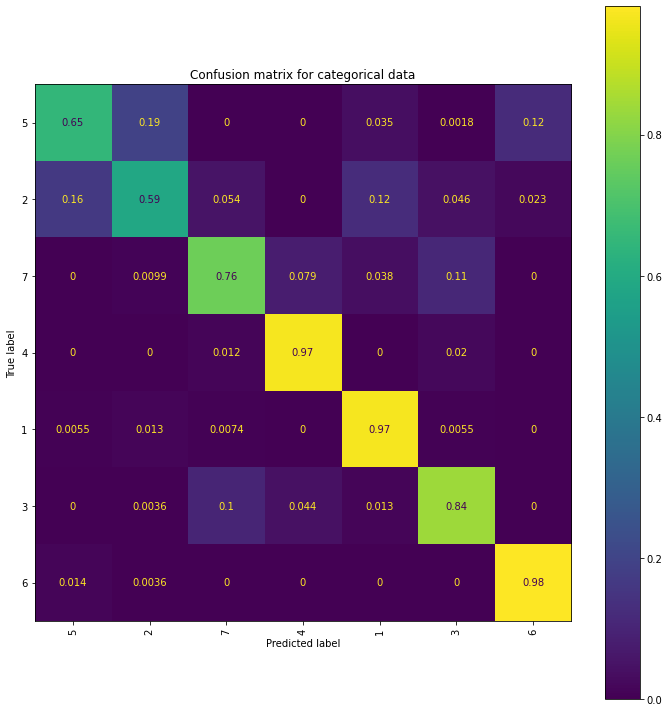

Classifier =  SVM_rbf on dataset 5


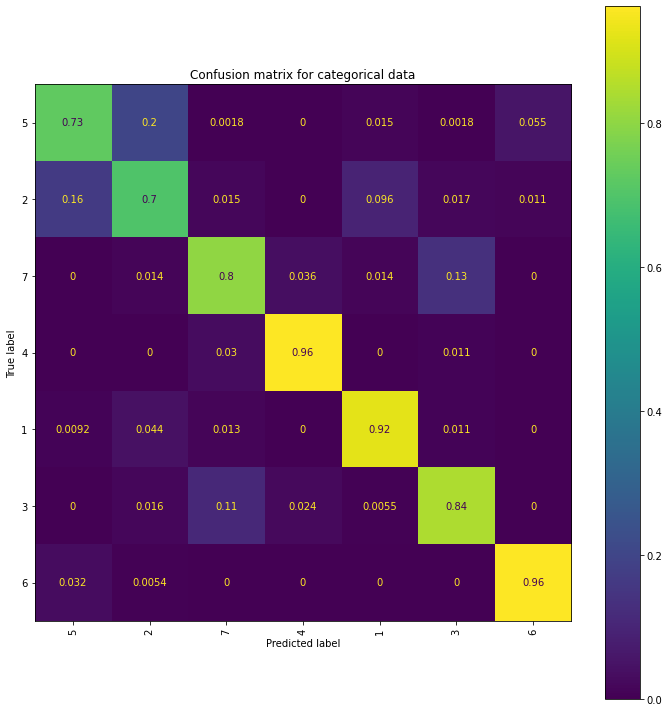

Classifier =  SVM_rbf on dataset 3


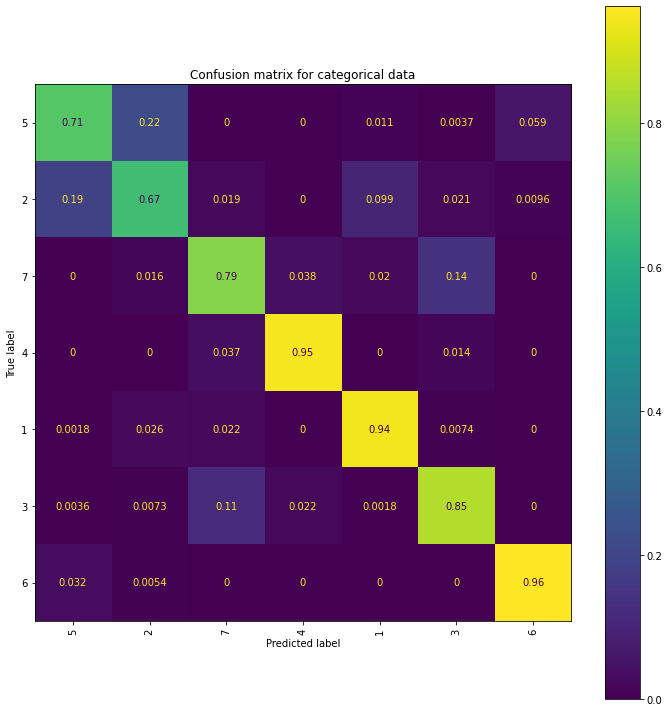

Classifier =  SVM_rbf on dataset 0


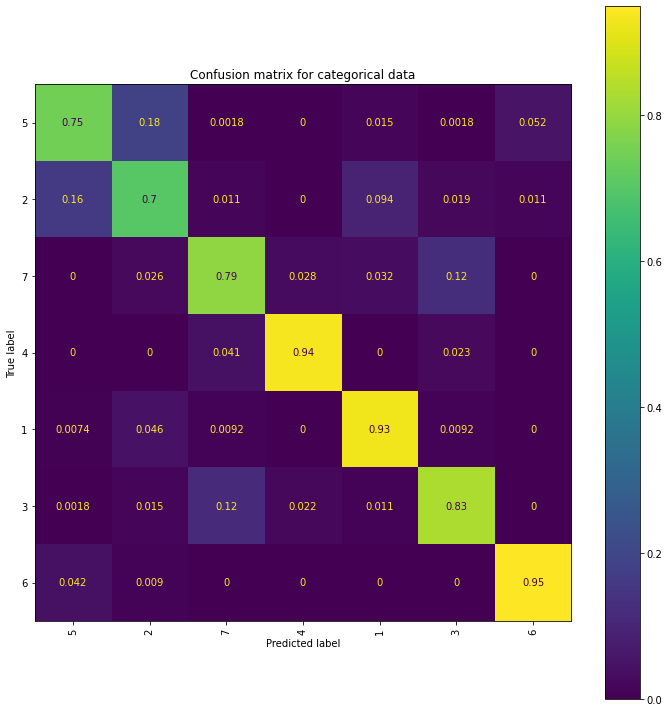

Classifier =  SVM_rbf on dataset 7


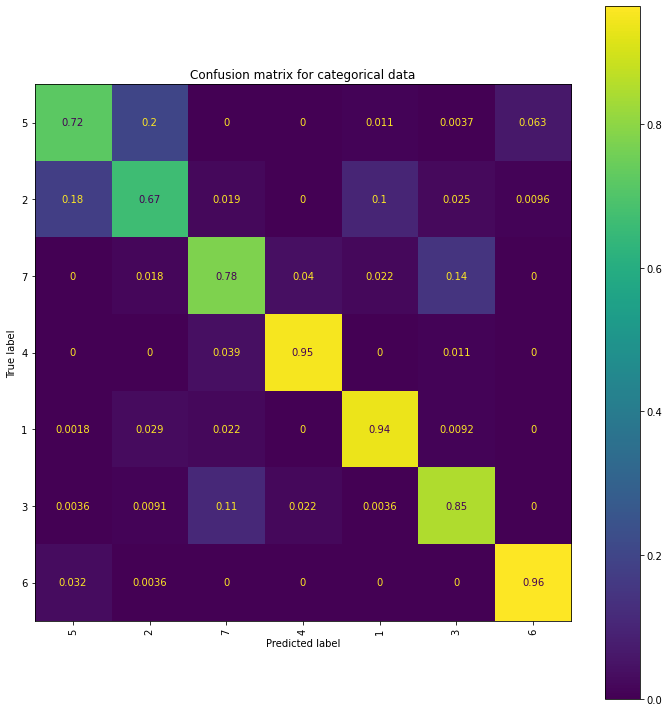

Classifier =  SVM_rbf on dataset 1


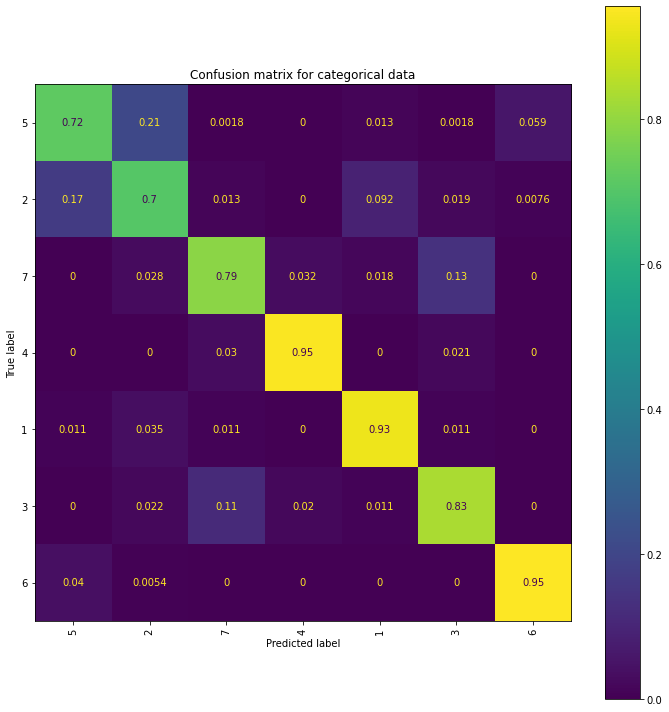

In [273]:
test_metrics_df = pd.DataFrame()

for i in range(len(best_models)): 
    dict_model = best_models[i]
    print("Classifier = ", dict_model["model_name"], "on dataset", dict_model["i_ds"])
    
    y_pred = dict_model["y_pred"]
    ## Confusion 
    cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
    cm_display = ConfusionMatrixDisplay(cm)

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    cm_display.plot(ax=ax)
    ax.set_title("Confusion matrix for categorical data")
    ax.set_xticklabels(y_test.unique(), rotation = 90)#[])
    ax.set_yticklabels(y_test.unique())
    plt.tight_layout()
    plt.savefig(RES_PATH+"figures/pred_confusion_matrix"+dict_model["model_name"]+str(dict_model["i_ds"]))
    plt.show()
    
    Y_test = pd.get_dummies(y_test)
    Y_pred = pd.get_dummies(y_pred)
    
    test_metrics_df.loc[i,"model_name"] = dict_model["model_name"]
    test_metrics_df.loc[i,"dataset"] = dict_model["i_ds"]
    test_metrics_df.loc[i,"AUC"] = roc_auc_score(Y_test,Y_pred,multi_class="ovo")
    test_metrics_df.loc[i,"balanced_accuracy"] = balanced_accuracy_score(y_test,y_pred)
    test_metrics_df.loc[i,"kappa_score"] = cohen_kappa_score(y_test,y_pred)
    test_metrics_df.loc[i,"matthews_corrcoef"] = matthews_corrcoef(y_test,y_pred)
    test_metrics_df.loc[i,"hinge_loss"] = hinge_loss(y_test,Y_pred)
    
    test_metrics_df.loc[i,"params"] = dict_model["params"].values()


The confusion metric is really close, for every SVR rbf models. 

In [199]:
test_metrics_df.dataset = test_metrics_df.dataset.astype(int) 
test_metrics_df

,model_name,dataset,AUC,balanced_accuracy,kappa_score,matthews_corrcoef,hinge_loss,params
0,Nearest Neighbors,4,0.897077,0.823105,0.797108,0.798199,0.347619,3.0
1,SVM_rbf,5,0.909441,0.844411,0.820943,0.821033,0.306878,100.0
2,SVM_rbf,3,0.905777,0.838094,0.813839,0.813983,0.319048,1000.0
3,SVM_rbf,0,0.907178,0.840544,0.816320,0.816401,0.314815,1000.0
4,SVM_rbf,7,0.905558,0.837703,0.813524,0.813678,0.319577,1000.0
5,SVM_rbf,1,0.906514,0.839393,0.815080,0.815176,0.316931,1000.0


The best model is the SVR rbf on dataset 5.

<a id ="section4"></a>
<a id ="section4.1"></a>
[back to menu](#menu)

# 4. Putting the model into production 
## 4.A Compute preprocess on data :

The dataset 5 is the PCA projection of the preprocessed numerical variables and the selected categorical ones. Let's recall how I extract these matrices.

In [56]:
DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P8/forest/"

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



In [57]:
# X_num = pd.read_csv(RES_PATH+"X_num_preprocessed.csv", index_col=0)
# X_cat_selected = pd.read_csv(RES_PATH+"X_cat_feature_selection.csv", index_col=0)

<a id ="section4.1.1"></a>
[back to menu](#menu)

### 4.A.a Export from beginning :

In [77]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
df_test = pd.read_csv(DATA_PATH+"/test.csv", index_col=0)

target_train = df_train.loc[:,"Cover_Type"]
df_train = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]


soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

cat_vars = soil_vars + area_vars
num_vars = [col for col in df_train.columns if col not in cat_vars]


#### Categorical variables : 

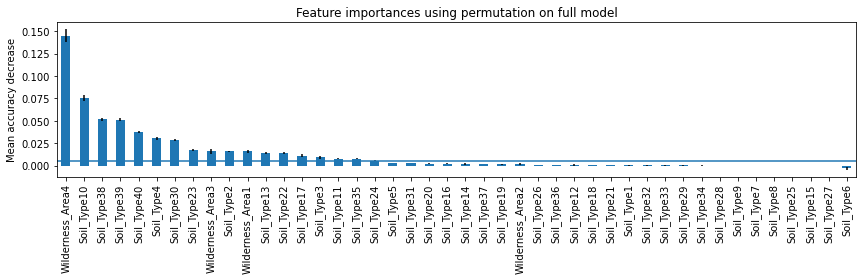

dropped vars :  Index(['Soil_Type5', 'Soil_Type31', 'Soil_Type20', 'Soil_Type16',
       'Soil_Type14', 'Soil_Type37', 'Soil_Type19', 'Wilderness_Area2',
       'Soil_Type26', 'Soil_Type36', 'Soil_Type12', 'Soil_Type18',
       'Soil_Type21', 'Soil_Type1', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type29', 'Soil_Type34', 'Soil_Type28', 'Soil_Type9', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type25', 'Soil_Type15', 'Soil_Type27',
       'Soil_Type6'],
      dtype='object')
kept vars :  Index(['Wilderness_Area4', 'Soil_Type10', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Soil_Type4', 'Soil_Type30', 'Soil_Type23',
       'Wilderness_Area3', 'Soil_Type2', 'Wilderness_Area1', 'Soil_Type13',
       'Soil_Type22', 'Soil_Type17', 'Soil_Type3', 'Soil_Type11',
       'Soil_Type35', 'Soil_Type24'],
      dtype='object')


In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:,cat_vars], target_train, random_state=10)
thrs = 0.005

## compute importance with columns shuffle
feature_names = X_train.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
result = permutation_importance( forest, X_test, y_test, 
                    n_repeats=10, random_state=42, n_jobs=8)

## extract dataframe with importance score and error width 
tmp = pd.DataFrame(result.importances_mean, columns=["importance"],
                   index=feature_names)
tmp.loc[:,"err"] = result.importances_std
tmp = tmp.sort_values("importance",ascending=False)

## plot
fig, ax = plt.subplots(figsize=(12,4))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.axhline(y=thrs)
fig.tight_layout()
plt.show()

print("dropped vars : ", tmp["importance"][tmp["importance"]< thrs].index)
print("kept vars : ", tmp["importance"][tmp["importance"]>= thrs].index)

The brut code of the kepts categories is :

In [79]:
cat_vars_selected = ['Wilderness_Area4', 'Soil_Type10', 'Soil_Type38', 'Soil_Type39',
           'Soil_Type40', 'Soil_Type4', 'Soil_Type30', 'Soil_Type23',
           'Wilderness_Area3', 'Soil_Type2', 'Wilderness_Area1', 'Soil_Type13',
           'Soil_Type22', 'Soil_Type17', 'Soil_Type3', 'Soil_Type11',
           'Soil_Type35', 'Soil_Type24']

def get_cat_X(X_):
    return(X_.loc[:,cat_vars])

cat_train = get_cat_X(df_train)
cat_test = get_cat_X(df_test)
cat_test.shape

(565892, 44)

#### Numerical vars :

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:,num_vars], target_train, random_state=10)

In [81]:
### PCA on localisation variables : 
hloc_vars = ["Horizontal_Distance_To_Roadways",
             "Horizontal_Distance_To_Fire_Points",
             "Horizontal_Distance_To_Hydrology"]
X_hloc = df_train.loc[:,hloc_vars]
## standardize
def get_hloc_pca_coeffs(X_hloc) :
    X_hloc = pd.DataFrame(StandardScaler().fit_transform(X_hloc), 
                          index=X_hloc.index, columns=X_hloc.columns)
    ## project :
    pca = PCA(n_components=X_hloc.shape[1]).fit(X_hloc)
    X_hloc = pd.DataFrame(pca.transform(X_hloc), index = X_hloc.index, 
                          columns=["HDis_ax_"+str(k) for k in range(1,pca.n_components+1)])
    hloc_pca_coeffs = pd.DataFrame(pca.components_, columns= hloc_vars, index = X_hloc.columns)
    return(hloc_pca_coeffs)
hloc_pca_coeffs = get_hloc_pca_coeffs(X_hloc)
print("For localisation projection, the coefficients are :")
hloc_pca_coeffs

For localisation projection, the coefficients are :


,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology
HDis_ax_1,0.657680,0.641418,0.395019
HDis_ax_2,-0.225187,-0.333003,0.915642
HDis_ax_3,-0.718852,0.691152,0.074570


In [82]:
## results hard coded :
hloc_pca_coeffs = [[ 0.65767998,  0.64141829,  0.39501851],
                   [-0.22518748, -0.33300285,  0.91564169],
                   [-0.71885161,  0.69115243,  0.07456994]]

def project_hloc_pca(X_, hloc_pca_coeffs):
    X_hloc = X_.loc[:,hloc_vars]
    
    hloc_pca_coeffs = pd.DataFrame(hloc_pca_coeffs, columns=hloc_vars, 
                                   index=["HDis_ax_"+str(k) for k in range(1,X_hloc.shape[1]+1)])
    ## standardize : 
    hloc_std = StandardScaler().fit(X_hloc)
    X_hloc_std = pd.DataFrame(hloc_std.transform(X_hloc), 
                          index=X_hloc.index, columns=X_hloc.columns)
    ## pcq project :
    X_hloc_proj = X_hloc_std.dot(hloc_pca_coeffs.transpose())
    return(X_hloc_proj)

X_hloc_proj = project_hloc_pca(df_train,hloc_pca_coeffs)

In [83]:
X_num = df_train.loc[:,["Elevation"]]

### Hillshade mean and std :
hillshade_vars = ["Hillshade_3pm","Hillshade_Noon", "Hillshade_9am"]
X_num.loc[:,"hillshade_std"] = df_train.loc[:,hillshade_vars].std(axis=1)
X_num.loc[:,"hillshade_median"] = df_train.loc[:,hillshade_vars].median(axis=1)

### PCA on localisation variables : 
X_hloc_proj = project_hloc_pca(df_train,hloc_pca_coeffs)
X_num = pd.concat([X_num,X_hloc_proj], axis=1)

In [84]:
def get_num_X2(X_):
    ## Let Elevation var intact :
    X_num = X_.loc[:,["Elevation"]]

    ### Hillshade mean and std :
    hillshade_vars = ["Hillshade_3pm","Hillshade_Noon", "Hillshade_9am"]
    X_num.loc[:,"hillshade_std"] = X_.loc[:,hillshade_vars].std(axis=1)
    X_num.loc[:,"hillshade_median"] = X_.loc[:,hillshade_vars].median(axis=1)

    ### PCA on localisation variables : 
    X_hloc_proj = project_hloc_pca(X_,hloc_pca_coeffs)
    X_num = pd.concat([X_num,X_hloc_proj], axis=1)
    return(X_num)


def get_num_X(X_):
    ## Let Elevation var intact :
    X_num = X_.loc[:,["Elevation", "Horizontal_Distance_To_Roadways",
                      "Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Hydrology"]]

    ### Hillshade mean and std :
    hillshade_vars = ["Hillshade_3pm","Hillshade_Noon", "Hillshade_9am"]
    X_num.loc[:,"hillshade_std"] = X_.loc[:,hillshade_vars].std(axis=1)
    X_num.loc[:,"hillshade_median"] = X_.loc[:,hillshade_vars].median(axis=1)

    return(X_num)

num_train = get_num_X(df_train)
num_test = get_num_X(df_test)
num_test.corr()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,hillshade_std,hillshade_median
Elevation,1.000000,0.355505,0.132929,0.301484,-0.059691,0.132913
Horizontal_Distance_To_Roadways,0.355505,1.000000,0.326046,0.067086,-0.094353,0.112204
Horizontal_Distance_To_Fire_Points,0.132929,0.326046,1.000000,0.047741,0.021988,0.149143
Horizontal_Distance_To_Hydrology,0.301484,0.067086,0.047741,1.000000,-0.052277,-0.010518
hillshade_std,-0.059691,-0.094353,0.021988,-0.052277,1.000000,0.290577
hillshade_median,0.132913,0.112204,0.149143,-0.010518,0.290577,1.000000


<a id ="section4.1.2"></a>
[back to menu](#menu)

### 4.A.b Complete preprocessing : 

In [85]:
def preprocess1(X_, calcul_hloc_pca=False):
    if calcul_hloc_pca :
        hloc_vars = ["Horizontal_Distance_To_Roadways",
                     "Horizontal_Distance_To_Fire_Points",
                     "Horizontal_Distance_To_Hydrology"]
        X_hloc = X.loc[:,hloc_vars]
        hloc_pca_coeffs = get_hloc_pca_coeffs(X_hloc)
    else : 
        hloc_pca_coeffs = [[ 0.65767998,  0.64141829,  0.39501851],
                           [-0.22518748, -0.33300285,  0.91564169],
                           [-0.71885161,  0.69115243,  0.07456994]]        
    X_num = get_num_X(X_)
    X_cat = get_cat_X(X_)
    X_complete = pd.concat([X_cat, X_num], axis=1)
    
    return(X_complete)

preprocess1_train = preprocess1(df_train)
preprocess1_test = preprocess1(df_test)
preprocess1_train.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,hillshade_std,hillshade_median
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2596,510,6279,258,45.654500,221.0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2590,390,6225,212,44.799554,220.0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2804,3180,6121,268,58.346665,234.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2785,3090,6211,242,66.972631,238.0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2595,391,6172,153,45.003704,220.0


#### Std, PCA projection :
Now that the data are accessible, let's statically preprocess them (standardize them and orthonormalize them by PCA projection)

In [86]:
def preprocess2(X_train, X_test):
    ## fit std model on X_train :
    my_std = StandardScaler()
    my_std.fit(X_train)
    X_train_std = my_std.transform(X_train)
    X_test_std = my_std.transform(X_test)
    
    ## fit pca projection on X_train standardized:
    n_compo = X_train.shape[1]
    my_pca = PCA(n_components=n_compo)
    my_pca.fit(X_train_std)
    res_train = my_pca.transform(X_train_std)
    res_train = pd.DataFrame(res_train, index=X_train.index, 
                             columns=["ax_"+str(k+1) for k in range(n_compo)])
    res_test = my_pca.transform(X_test_std)
    res_test = pd.DataFrame(res_test, index=X_test.index, 
                             columns=["ax_"+str(k+1) for k in range(n_compo)])
    return(res_train,res_test)

X_train_, X_test = preprocess2(preprocess1_train,preprocess1_test)

<a id ="section4.2"></a>
[back to menu](#menu)

## 4.B Support Vector Machine Classification
Let's train our best model of classification. While testing multiple models, I used a vote for multi-class classificatio, because every model tested did not support multi-class classification, but the SVC sklearn method proposes a ovo multiclass vote, so the code would be :

In [87]:
def get_dict_index(res):
    '''
    Get the index of different values in the results_cv dictionnary of GridSearchCV : {param:[bool_array_value1, bool_array_value2, ...]}
    '''
    dict_index_values = {}
    for param_name in res["params"][0].keys() : 
        index_values = []
        param_values = np.unique([dict_params[param_name] for dict_params in res["params"] ])
        for value in param_values :
            index_value = [dict_params[param_name] == value for dict_params in res["params"]]
            index_values.append(index_value)
        dict_index_values[param_name] = index_values
    return(dict_index_values)

def get_score_and_time(param_name, res, dict_index_values):
    '''
    Get mean score and the mean time for the parameter param_name, from res and dict_index_values

    Parameters:
    -----------------------------------------
    param_name : str of the parameter name
    res : results_cv dictionnary of GridSearchCV
    dict_index_values : result from get_dict_index(res)
    
    Returns:
    -----------------------------------------
    mean score, mean time    
    '''
    mean_score_param = []
    time_param = []
    for index_value in dict_index_values[param_name] :
        mean_score_param.append(np.mean(res["mean_test_score"][index_value]))
        time_tmp = (res["mean_fit_time"] + res["mean_score_time"])[index_value]
        time_param.append(np.mean(time_tmp))
    return(mean_score_param,time_param)

def cv_plot_score_and_time(x, y_score, y_time, subplot = [1,2,1],
                           param_name="", x_log_scale = True):
    '''

    Parameters:
    -----------------------------------------

    
    Returns:
    -----------------------------------------
    '''
    subplot = subplot.copy()
    plt.subplot(*subplot)
    if x_log_scale : 
        plt.xscale("log")
    plt.plot(x, y_score)
    plt.xlabel("hyperparam. " + param_name)#get param name 
    plt.ylabel("score")
    plt.title("Score in Cross validation")
    subplot[2] += 1
    plt.subplot(*subplot)
    if x_log_scale : 
        plt.xscale("log")
    plt.plot(x, y_time)
    plt.xlabel("hyperparam. " + param_name)#get param name 
    plt.ylabel("time (s)")
    plt.title("Time in Cross validation")

def plot_cv_res(res,dict_log_param) :
    '''

    Parameters:
    -----------------------------------------

    
    Returns:
    -----------------------------------------
    '''
    dict_index_values = get_dict_index(res)
    nb_params = len(res["params"][0].keys())
    plt.figure(figsize=(10,4*nb_params))
    subplot_pos = [nb_params,2,1]

    for param_name in res["params"][0].keys() :
        x = np.unique([dict_params[param_name] for dict_params in res["params"]])
        y_score, y_time = get_score_and_time(param_name, res, dict_index_values)
        log_flag = dict_log_param[param_name]
        cv_plot_score_and_time(x, y_score, y_time,subplot_pos, 
                               param_name= param_name, x_log_scale=log_flag)
        subplot_pos[2]+= 2

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_train_, target_train, random_state=1)
clf = SVC(kernel="rbf", C=100, decision_function_shape="ovo")
param_grid = {"C" : [1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}
grid = GridSearchCV(clf, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(C=100, decision_function_shape='ovo'),
             param_grid={'C': [1000.0, 10000.0, 100000.0, 1000000.0,
                               10000000.0]})

In [70]:
grid.best_params()

0.8007936507936508

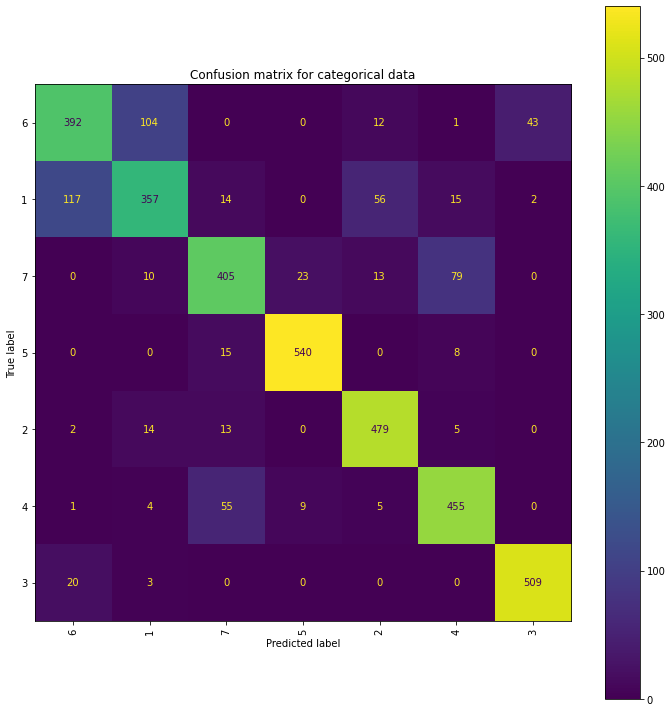

In [98]:
## with all cat variables, C = 50000
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_test.unique(), rotation = 90)#[])
ax.set_yticklabels(y_test.unique())
plt.tight_layout()

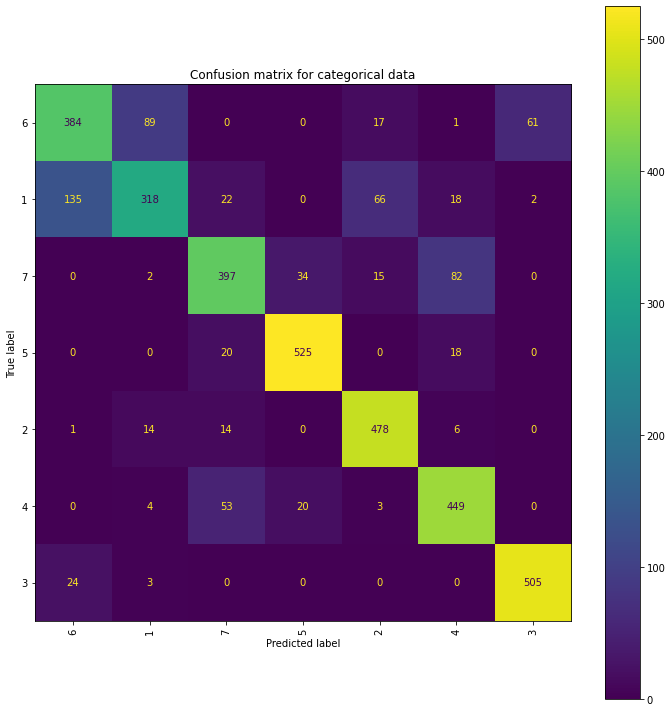

In [96]:
## with cat selection 
clf2 = SVC(kernel="rbf", C=1e7, decision_function_shape="ovo")
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_test.unique(), rotation = 90)#[])
ax.set_yticklabels(y_test.unique())
plt.tight_layout()

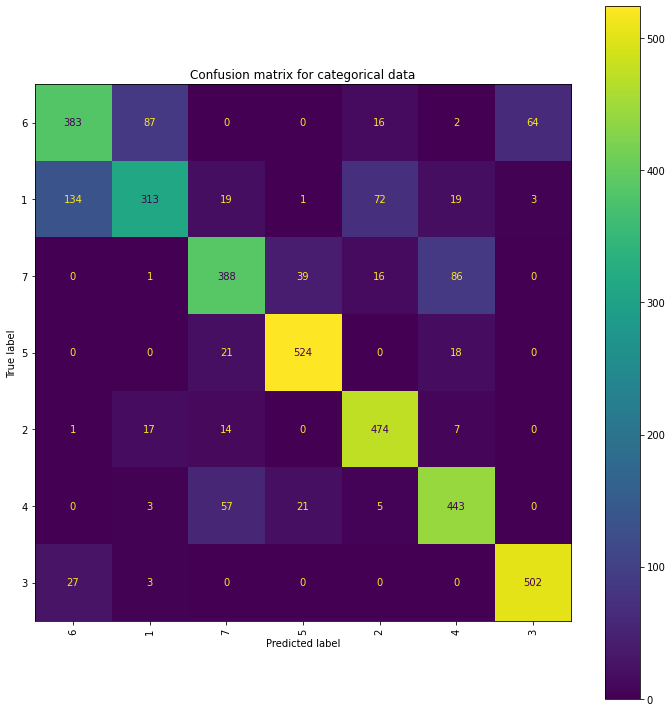

In [92]:
## with all cat variables, C = 50000
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_pred=y_pred, y_true=y_test, normalize="true")
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_test.unique(), rotation = 90)#[])
ax.set_yticklabels(y_test.unique())
plt.tight_layout()

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_train_, target_train, random_state=1)
clf = SVC(kernel="rbf", C=100, decision_function_shape="ovo")
param_grid = {"C" : [1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}
grid = GridSearchCV(clf, param_grid=param_grid)
grid.fit(X_train, y_train)

In [64]:
clf = SVC(kernel="rbf", C=1e7, decision_function_shape="ovo")
## train 
t0 = time.time()
clf.fit(X_train, target_train)
t_train = time.time() - t0
print(np.round(t_train,2), "seconds to train the whole model")

2.7 seconds to train the whole model


In [43]:
t0 = time.time()
prediction = clf.predict(X_test)
t_predict = time.time() - t0
print(np.round(t_predict,2), "seconds to get the prediction")

283.79 seconds to get the prediction


In [44]:
predictions = pd.Series(prediction, index=X_test.index, name = "Cover_Type")

In [46]:
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P8/"
predictions.to_csv(RES_PATH+"forest_prediction.csv", header=True)

In [47]:
predictions.unique()

array([2, 5, 1, 7, 3, 6, 4])

In [26]:
clf.feature_names_in_

array(['ax_1', 'ax_2', 'ax_3', 'ax_4', 'ax_5', 'ax_6', 'ax_7', 'ax_8',
       'ax_9', 'ax_10', 'ax_11', 'ax_12', 'ax_13', 'ax_14', 'ax_15',
       'ax_16', 'ax_17', 'ax_18', 'ax_19', 'ax_20'], dtype=object)

In [52]:
X_train.shape

(11340, 55)

In [53]:
X_test.shape

(3780, 55)